# Phase III Project: Chicago  Car Crashes

### Group Members
1. Mark Kuria
2. Rhoda Musyoki
3. Mlati Ochieng'
3. Dianna Wangura
4. Caroline Mbugua
5. Eunita Nyengo

### Student Pace
Part-time

### Instructors
1. Samwel Jane
2. Veronica Isiaho
3. Midlred Jepkosgei

### Problem Statement
Traffic accidents continue to be a significant global and public safety concern, claiming an estimated 1.35 million lives annually and ranking as the leading cause of death for children and young adults aged 5-29 years. The economic and social costs associated with these accidents are immense, impacting individuals, families, and communities worldwide. This necessitates a escomprehensive understanding of the primary contributory causes behind these incidents. Accurately predicting the primary contributory cause of accidents can empower stakeholders to implement targeted interventions and reduce their occurrence. However, the diverse factors contributing to accidents pose a challenge for traditional prediction methods.

The aim of this project is to develop a multi-class classification model that predicts the primary contributory cause of car accidents in Chicago. Targeting the Vehicle Safety Board as the primary audience, the focus is on generating insights that can inform strategies to reduce traffic accidents and improve overall road safety. Given the complexity of contributory causes and the need for actionable insights, the model aims to categorize accidents into relevant classes while considering the potential imbalance in the dataset.

### Stakeholder
The primary stakeholder in this scenario is the Vehicle Safety Board of Chicago. They are launching a new campaign with the goal of reducing car crashes in the city.

### Business Understanding
The Vehicle Safety Board is deeply invested in reducing traffic accidents and ensuring road safety in Chicago. Understanding the primary contributory causes of car accidents is crucial for implementing targeted interventions and preventive measures. By analyzing historical accident data and building a predictive model, the board aims to identify patterns and factors that contribute to accidents. This information will enable the board to prioritize safety initiatives, allocate resources effectively, and collaborate with relevant stakeholders to implement measures aimed at reducing accidents and promoting safe driving practices.


### Objectives
1. Develop a Multi-Class Classification Model capable of accurately predicting the primary contributory cause of car accidents based on available data.
2. Identify Significant Predictors prioritise the predictors that influence the primary contributory cause of car accidents, including factors such as weather conditions, road conditions, and vehicle characteristics.Evaluate Model Performance:
3. Assess the performance of the developed classification model through rigorous evaluation metrics such as accuracy, precision, recall, and F1-score, ensuring its reliability and effectiveness.
4. Provide actionable insights to the Vehicle Safety Board by interpreting the model results and highlighting key factors contributing to different primary contributory causes of car accidents. These insights will guide the development and implementation of targeted safety interventions and road safety initiatives in Chicago.

### Methodology
This paper analyzes traffic accident data from Chicago, publicly available on data.cityofchicago.org, to predict accident severity and risk using various data and modeling methods.

Data was sourced from a public website:
1. Crashes ; https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data
2. Vehicles ; https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/about_data
3. People ; https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d/about_data

##### Data Description
This report leverages a rich dataset encompassing over 350,000 traffic accidents that occurred in the Chicago metropolitan area between the year 2021 to 2023. Each observation provides granular details about the crash, including but not limited to:

1. Date & Time: Precise timestamp of the accident occurrence.
2. Cause: Primary factor contributing to the crash.
3. Collision Type: The specific type of collision (e.g., rear-end, side-swipe).
4. Damage: Severity of the damage caused by the accident.
5. Vehicles Involved: Number of vehicles involved in the crash.
6. Day/Month/Hour: Contextual information about the time of day and month.
7. Weather: Weather conditions prevailing at the time of the accident.
8. Road Surface: Condition of the road surface (wet, dry, snowy, etc.).
9. Severity: Most severe injury sustained in the accident (fatal, incapacitating, non-incapacitating).
10. Location: Precise coordinates (latitude and longitude) of the crash.
11. Demographics: Sex and age of individuals involved.

This comprehensive dataset offers valuable insights into various aspects of traffic accidents in Chicago, enabling comprehensive analysis and exploration of crash pattererns.

## Importing Libraries and Loading Data Sets

In [1]:
# Importing the necessary libraries

# Standard Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier  # Now, this should work
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve

# External Library Installations
!pip install --user --upgrade scikit-learn
!pip install imbalanced-learn==0.12.0

!pip install shap
import shap 
shap.initjs()

import six
import sys
sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC

# Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

# Example data (replace with your actual data)
y_true = [0, 0, 1, 1, 1, 0, 1, 0]
y_pred = [0.2, 0.3, 0.8, 0.6, 0.9, 0.1, 0.7, 0.4]


In [2]:
#!pip install lightgbm

In [3]:
#import sklearn
#print(sklearn.__version__)

In [4]:
#pip install scikit-learn==0.24.2

In [5]:
#Loading Data into panda data frames
df_Crashes = pd.read_csv("\\Users\\user\\Downloads\\Traffic_Crashes_-_Crashes_2024.csv", low_memory=False, index_col=None)
df_Vehicles = pd.read_csv("\\Users\\user\\Downloads\\Traffic_Crashes_-_Vehicles_20240208.csv", low_memory=False, index_col=None)
df_People = pd.read_csv("\\Users\\user\\Downloads\\Traffic_Crashes_-_People_20240208.csv", low_memory=False, index_col=None)

In [6]:
# Identifying common columns using the intersection of columns
common_columns = set(df_Crashes.columns) & set(df_People.columns) & set(df_Vehicles.columns)
print("Common Columns:", common_columns)

Common Columns: {'CRASH_DATE', 'CRASH_RECORD_ID'}


## Crashes Dataset - Exploration & Understanding

### Structure of Crashes Dataset

#### Data Dictionary: 


In [7]:
#Checking the column names, data types, and basic structure
df_Crashes.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19.0,3.0,9.0,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50.0,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18.0,6.0,9.0,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14.0,7.0,7.0,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30.0,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23.0,4.0,8.0,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15.0,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12.0,6.0,8.0,NaN,NaN,NaN


In [8]:
#Checking for any potential inconsistencies or errors at the end of the data
df_Crashes.tail()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
208960,3b4c643825411d6cdf1df2c036fd7dc67e8853249893ea...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208961,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208962,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208963,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208964,},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Their seems to be a number of missing data and the CRASH_RECORD_ID column is also incosistent with what's at the head

In [9]:
#Summary of the DataFrame:column names, data types,data shape, non-null counts, memory usage, and other characteristics.
df_Crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208965 entries, 0 to 208964
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                208965 non-null  object 
 1   CRASH_DATE_EST_I               15540 non-null   object 
 2   CRASH_DATE                     208960 non-null  object 
 3   POSTED_SPEED_LIMIT             208960 non-null  float64
 4   TRAFFIC_CONTROL_DEVICE         208960 non-null  object 
 5   DEVICE_CONDITION               208960 non-null  object 
 6   WEATHER_CONDITION              208960 non-null  object 
 7   LIGHTING_CONDITION             208960 non-null  object 
 8   FIRST_CRASH_TYPE               208960 non-null  object 
 9   TRAFFICWAY_TYPE                208960 non-null  object 
 10  LANE_CNT                       48702 non-null   float64
 11  ALIGNMENT                      208960 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [10]:
# Checking for central tendency, spread, and potential outliers in numerical data
df_Crashes.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,208960.000000,48702.000000,208960.000000,208958.000000,208960.000000,208382.000000,208382.000000,208382.000000,208382.000000,208382.000000,208382.000000,208382.0,208960.000000,208960.000000,208960.000000,203471.000000,203471.000000
mean,28.349411,11.461542,3683.470621,1245.629581,2.033724,0.190991,0.001396,0.019791,0.106684,0.063120,2.000077,0.0,13.191305,4.113467,6.561299,41.847416,-87.657912
std,6.274264,1964.933131,3027.118391,704.083579,0.460092,0.571114,0.039710,0.163410,0.422693,0.325683,1.152018,0.0,5.574381,1.976927,3.542897,0.655194,1.361762
min,0.000000,0.000000,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000,1225.000000,715.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,3.000000,41.782440,-87.721923
50%,30.000000,2.000000,3200.000000,1213.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874799,-87.674541
75%,30.000000,4.000000,5600.000000,1821.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924475,-87.633446
max,99.000000,433634.000000,451100.000000,6100.000000,18.000000,21.000000,3.000000,6.000000,21.000000,11.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


### Indicate observation

In [11]:
# Checking the value count of the data types
print("Data types: ","\n", df_Crashes.dtypes.value_counts())

Data types:  
 object     31
float64    17
Name: count, dtype: int64


In [12]:
df_Crashes.value_counts()

Series([], Name: count, dtype: int64)

In [13]:
#Convert 'CRASH_DATE' to datetime format
df_Crashes['CRASH_DATE'] = pd.to_datetime(df_Crashes['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')

In [14]:
# Extract year from 'CRASH_DATE_x' and create a new column 'CRASH_YEAR'
df_Crashes['CRASH_YEAR'] = df_Crashes['CRASH_DATE'].dt.year

In [15]:
#rexamining the structure
df_Crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208965 entries, 0 to 208964
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                208965 non-null  object        
 1   CRASH_DATE_EST_I               15540 non-null   object        
 2   CRASH_DATE                     208960 non-null  datetime64[ns]
 3   POSTED_SPEED_LIMIT             208960 non-null  float64       
 4   TRAFFIC_CONTROL_DEVICE         208960 non-null  object        
 5   DEVICE_CONDITION               208960 non-null  object        
 6   WEATHER_CONDITION              208960 non-null  object        
 7   LIGHTING_CONDITION             208960 non-null  object        
 8   FIRST_CRASH_TYPE               208960 non-null  object        
 9   TRAFFICWAY_TYPE                208960 non-null  object        
 10  LANE_CNT                       48702 non-null   float64       
 11  

In [16]:
# filtering the df_Crashes DataFrame to retain only rows from the years 2021, 2022, and 2023.
df_Crashes = df_Crashes[df_Crashes['CRASH_YEAR'].isin([2021, 2022, 2023])]

### Checking for Duplicates

In [17]:
# Checking for duplicates rows
duplicates = df_Crashes.duplicated()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

# Display the duplicate rows
duplicate_rows = df_Crashes[duplicates]
print("Duplicate Rows:")
print(duplicate_rows)

Number of duplicate rows: 0
Duplicate Rows:
Empty DataFrame
Columns: [CRASH_RECORD_ID, CRASH_DATE_EST_I, CRASH_DATE, POSTED_SPEED_LIMIT, TRAFFIC_CONTROL_DEVICE, DEVICE_CONDITION, WEATHER_CONDITION, LIGHTING_CONDITION, FIRST_CRASH_TYPE, TRAFFICWAY_TYPE, LANE_CNT, ALIGNMENT, ROADWAY_SURFACE_COND, ROAD_DEFECT, REPORT_TYPE, CRASH_TYPE, INTERSECTION_RELATED_I, NOT_RIGHT_OF_WAY_I, HIT_AND_RUN_I, DAMAGE, DATE_POLICE_NOTIFIED, PRIM_CONTRIBUTORY_CAUSE, SEC_CONTRIBUTORY_CAUSE, STREET_NO, STREET_DIRECTION, STREET_NAME, BEAT_OF_OCCURRENCE, PHOTOS_TAKEN_I, STATEMENTS_TAKEN_I, DOORING_I, WORK_ZONE_I, WORK_ZONE_TYPE, WORKERS_PRESENT_I, NUM_UNITS, MOST_SEVERE_INJURY, INJURIES_TOTAL, INJURIES_FATAL, INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING, INJURIES_REPORTED_NOT_EVIDENT, INJURIES_NO_INDICATION, INJURIES_UNKNOWN, CRASH_HOUR, CRASH_DAY_OF_WEEK, CRASH_MONTH, LATITUDE, LONGITUDE, LOCATION, CRASH_YEAR]
Index: []

[0 rows x 49 columns]


##### The Crashes dataset does not contain any identical rows, and each row is unique based on the columns considered. This is a good sign, as it suggests that there are no exact duplicates in this dataset

### Checking for missing data 

In [18]:
# Calculate percentage of missing values
missing_crashesval = (df_Crashes.isnull().sum() / len(df_Crashes)) * 100
missing_crashesval

CRASH_RECORD_ID                   0.000000
CRASH_DATE_EST_I                 92.566566
CRASH_DATE                        0.000000
POSTED_SPEED_LIMIT                0.000000
TRAFFIC_CONTROL_DEVICE            0.000000
DEVICE_CONDITION                  0.000000
WEATHER_CONDITION                 0.000000
LIGHTING_CONDITION                0.000000
FIRST_CRASH_TYPE                  0.000000
TRAFFICWAY_TYPE                   0.000000
LANE_CNT                         99.992829
ALIGNMENT                         0.000000
ROADWAY_SURFACE_COND              0.000000
ROAD_DEFECT                       0.000000
REPORT_TYPE                       4.383575
CRASH_TYPE                        0.000000
INTERSECTION_RELATED_I           76.786653
NOT_RIGHT_OF_WAY_I               95.434772
HIT_AND_RUN_I                    66.186242
DAMAGE                            0.000000
DATE_POLICE_NOTIFIED              0.000000
PRIM_CONTRIBUTORY_CAUSE           0.000000
SEC_CONTRIBUTORY_CAUSE            0.000000
STREET_NO  

In [19]:
# Create a DataFrame to display missing value statistics
missingstats_crashes = pd.DataFrame({'Column': df_Crashes.columns, 'Missing Percentage': missing_crashesval})
missingstats_crashes = missingstats_crashes.sort_values(by='Missing Percentage', ascending=False)
print(missingstats_crashes)

                                                      Column  \
LANE_CNT                                            LANE_CNT   
WORKERS_PRESENT_I                          WORKERS_PRESENT_I   
DOORING_I                                          DOORING_I   
WORK_ZONE_TYPE                                WORK_ZONE_TYPE   
WORK_ZONE_I                                      WORK_ZONE_I   
PHOTOS_TAKEN_I                                PHOTOS_TAKEN_I   
STATEMENTS_TAKEN_I                        STATEMENTS_TAKEN_I   
NOT_RIGHT_OF_WAY_I                        NOT_RIGHT_OF_WAY_I   
CRASH_DATE_EST_I                            CRASH_DATE_EST_I   
INTERSECTION_RELATED_I                INTERSECTION_RELATED_I   
HIT_AND_RUN_I                                  HIT_AND_RUN_I   
REPORT_TYPE                                      REPORT_TYPE   
LATITUDE                                            LATITUDE   
LONGITUDE                                          LONGITUDE   
LOCATION                                

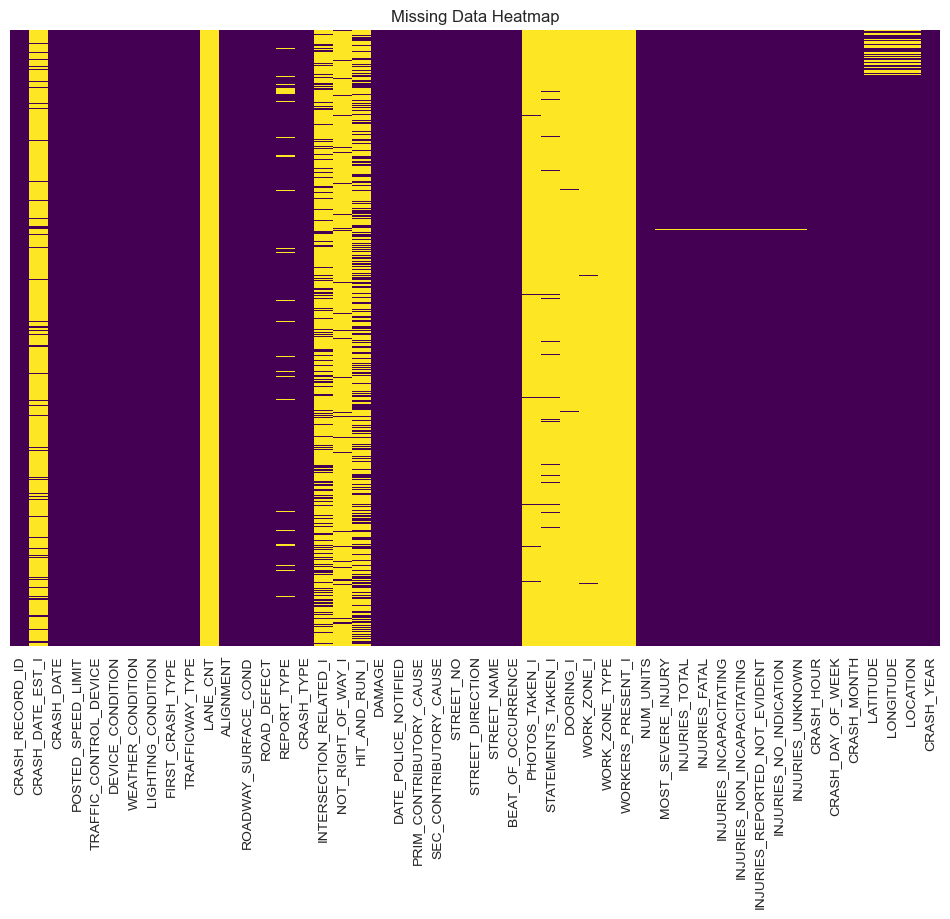

In [20]:
# Creating a heatmap of the missing values above
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(df_Crashes.isnull(), cbar=False, cmap='viridis', yticklabels=False)  # Adjusting yticklabels to False
plt.title('Missing Data Heatmap')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)  # Adding grid lines
plt.show()

#### Observations:

The following rows are missing most of the data: 
                              Missing Percentage  
1. WORKERS_PRESENT_I                       99.841600  
2. DOORING_I                               99.713349  
3. WORK_ZONE_TYPE                          99.542986  
4. WORK_ZONE_I                             99.421913  
5. PHOTOS_TAKEN_I                          98.706960  
6. STATEMENTS_TAKEN_I                      97.716843  
7. NOT_RIGHT_OF_WAY_I                      95.337975  
8. CRASH_DATE_EST_I                        92.563348  
9. INTERSECTION_RELATED_I                  77.110042  
10. LANE_CNT                               76.693705  
11. HIT_AND_RUN_I                          68.891920  

##### We'll consider dropping these during data cleaning & preprocessing exercise

### Visualizing the counts of different categories

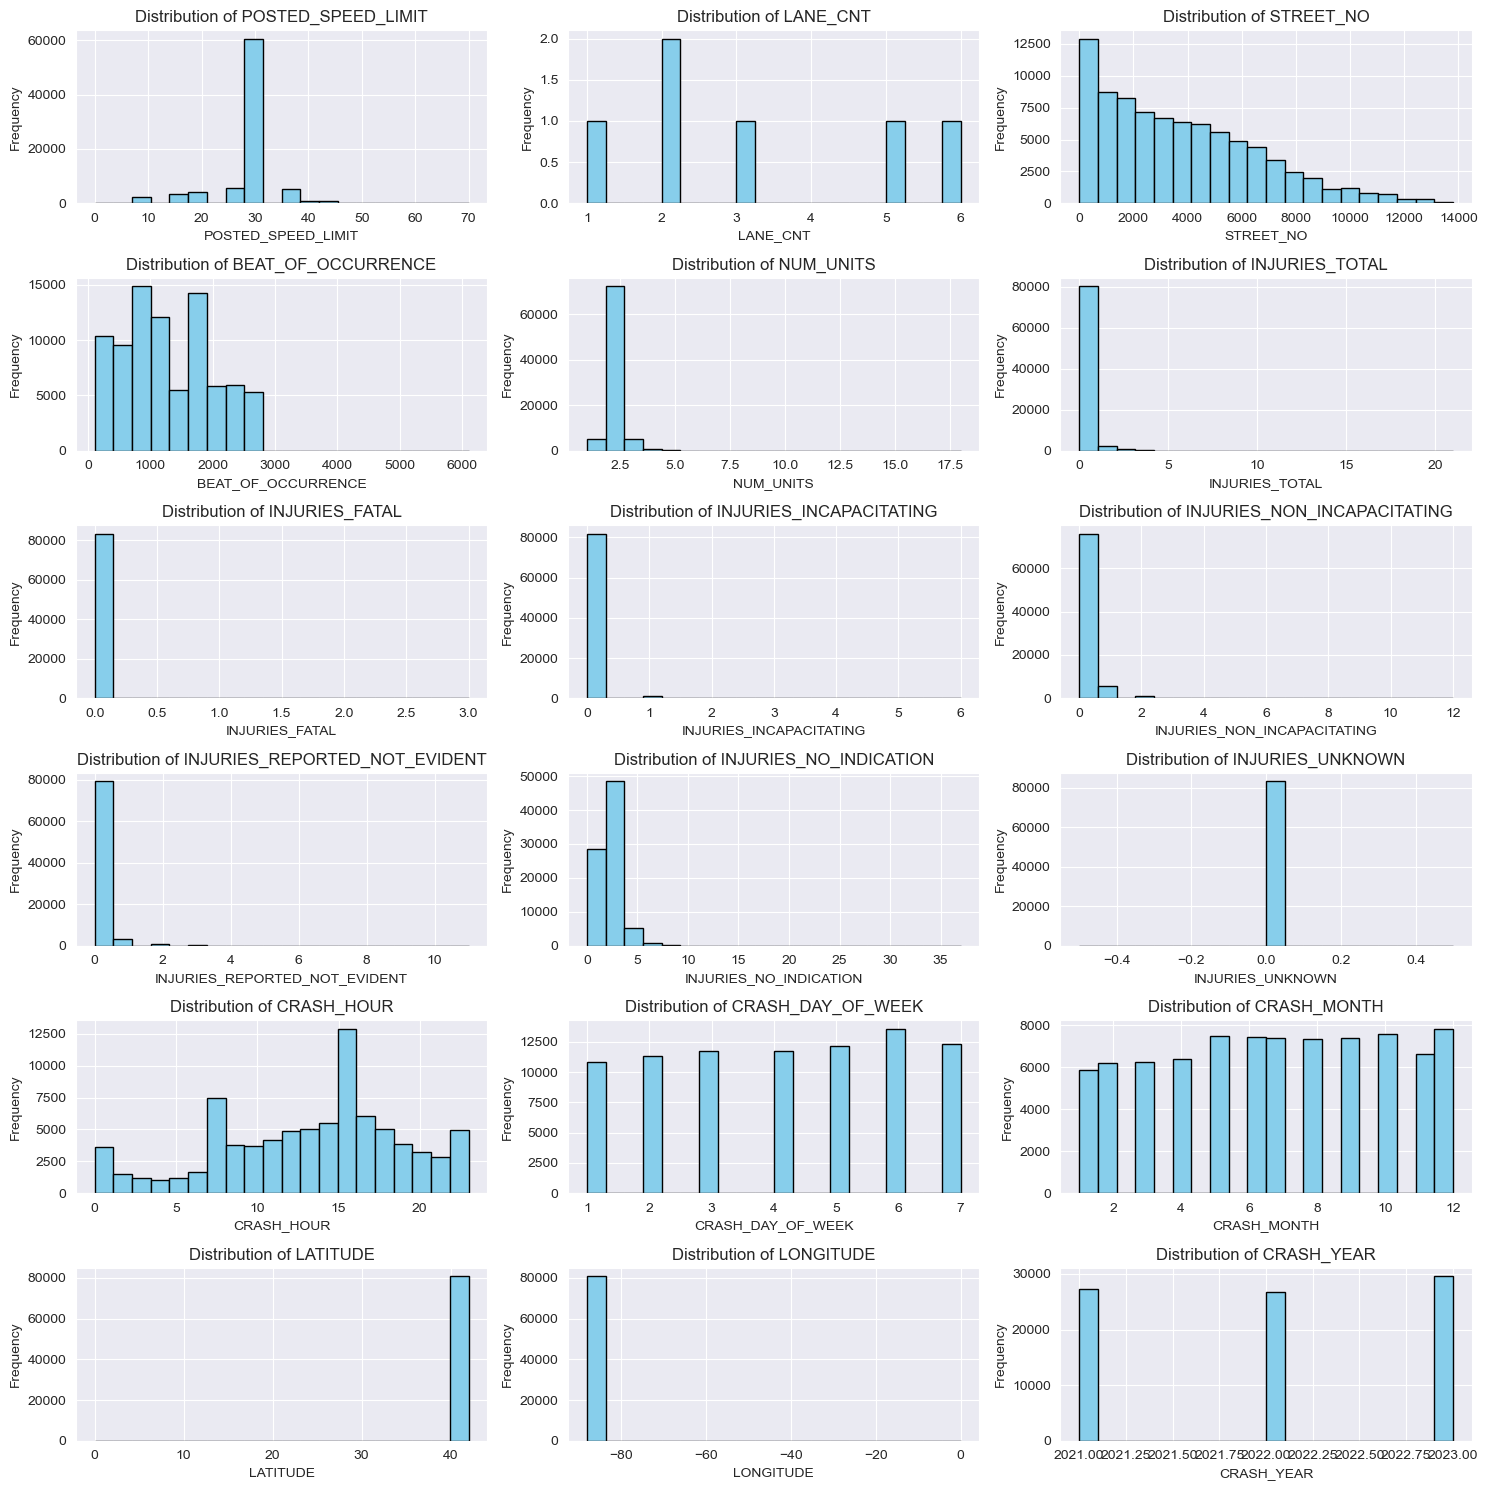

In [21]:
# Using Histograms to check the distribution of the numerical features
# Selecting only the numerical features for the histogram
numerical_features = ['POSTED_SPEED_LIMIT', 'LANE_CNT', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
                      'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
                      'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN',
                      'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'CRASH_YEAR']

# Create subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    axes[i].hist(df_Crashes[feature].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

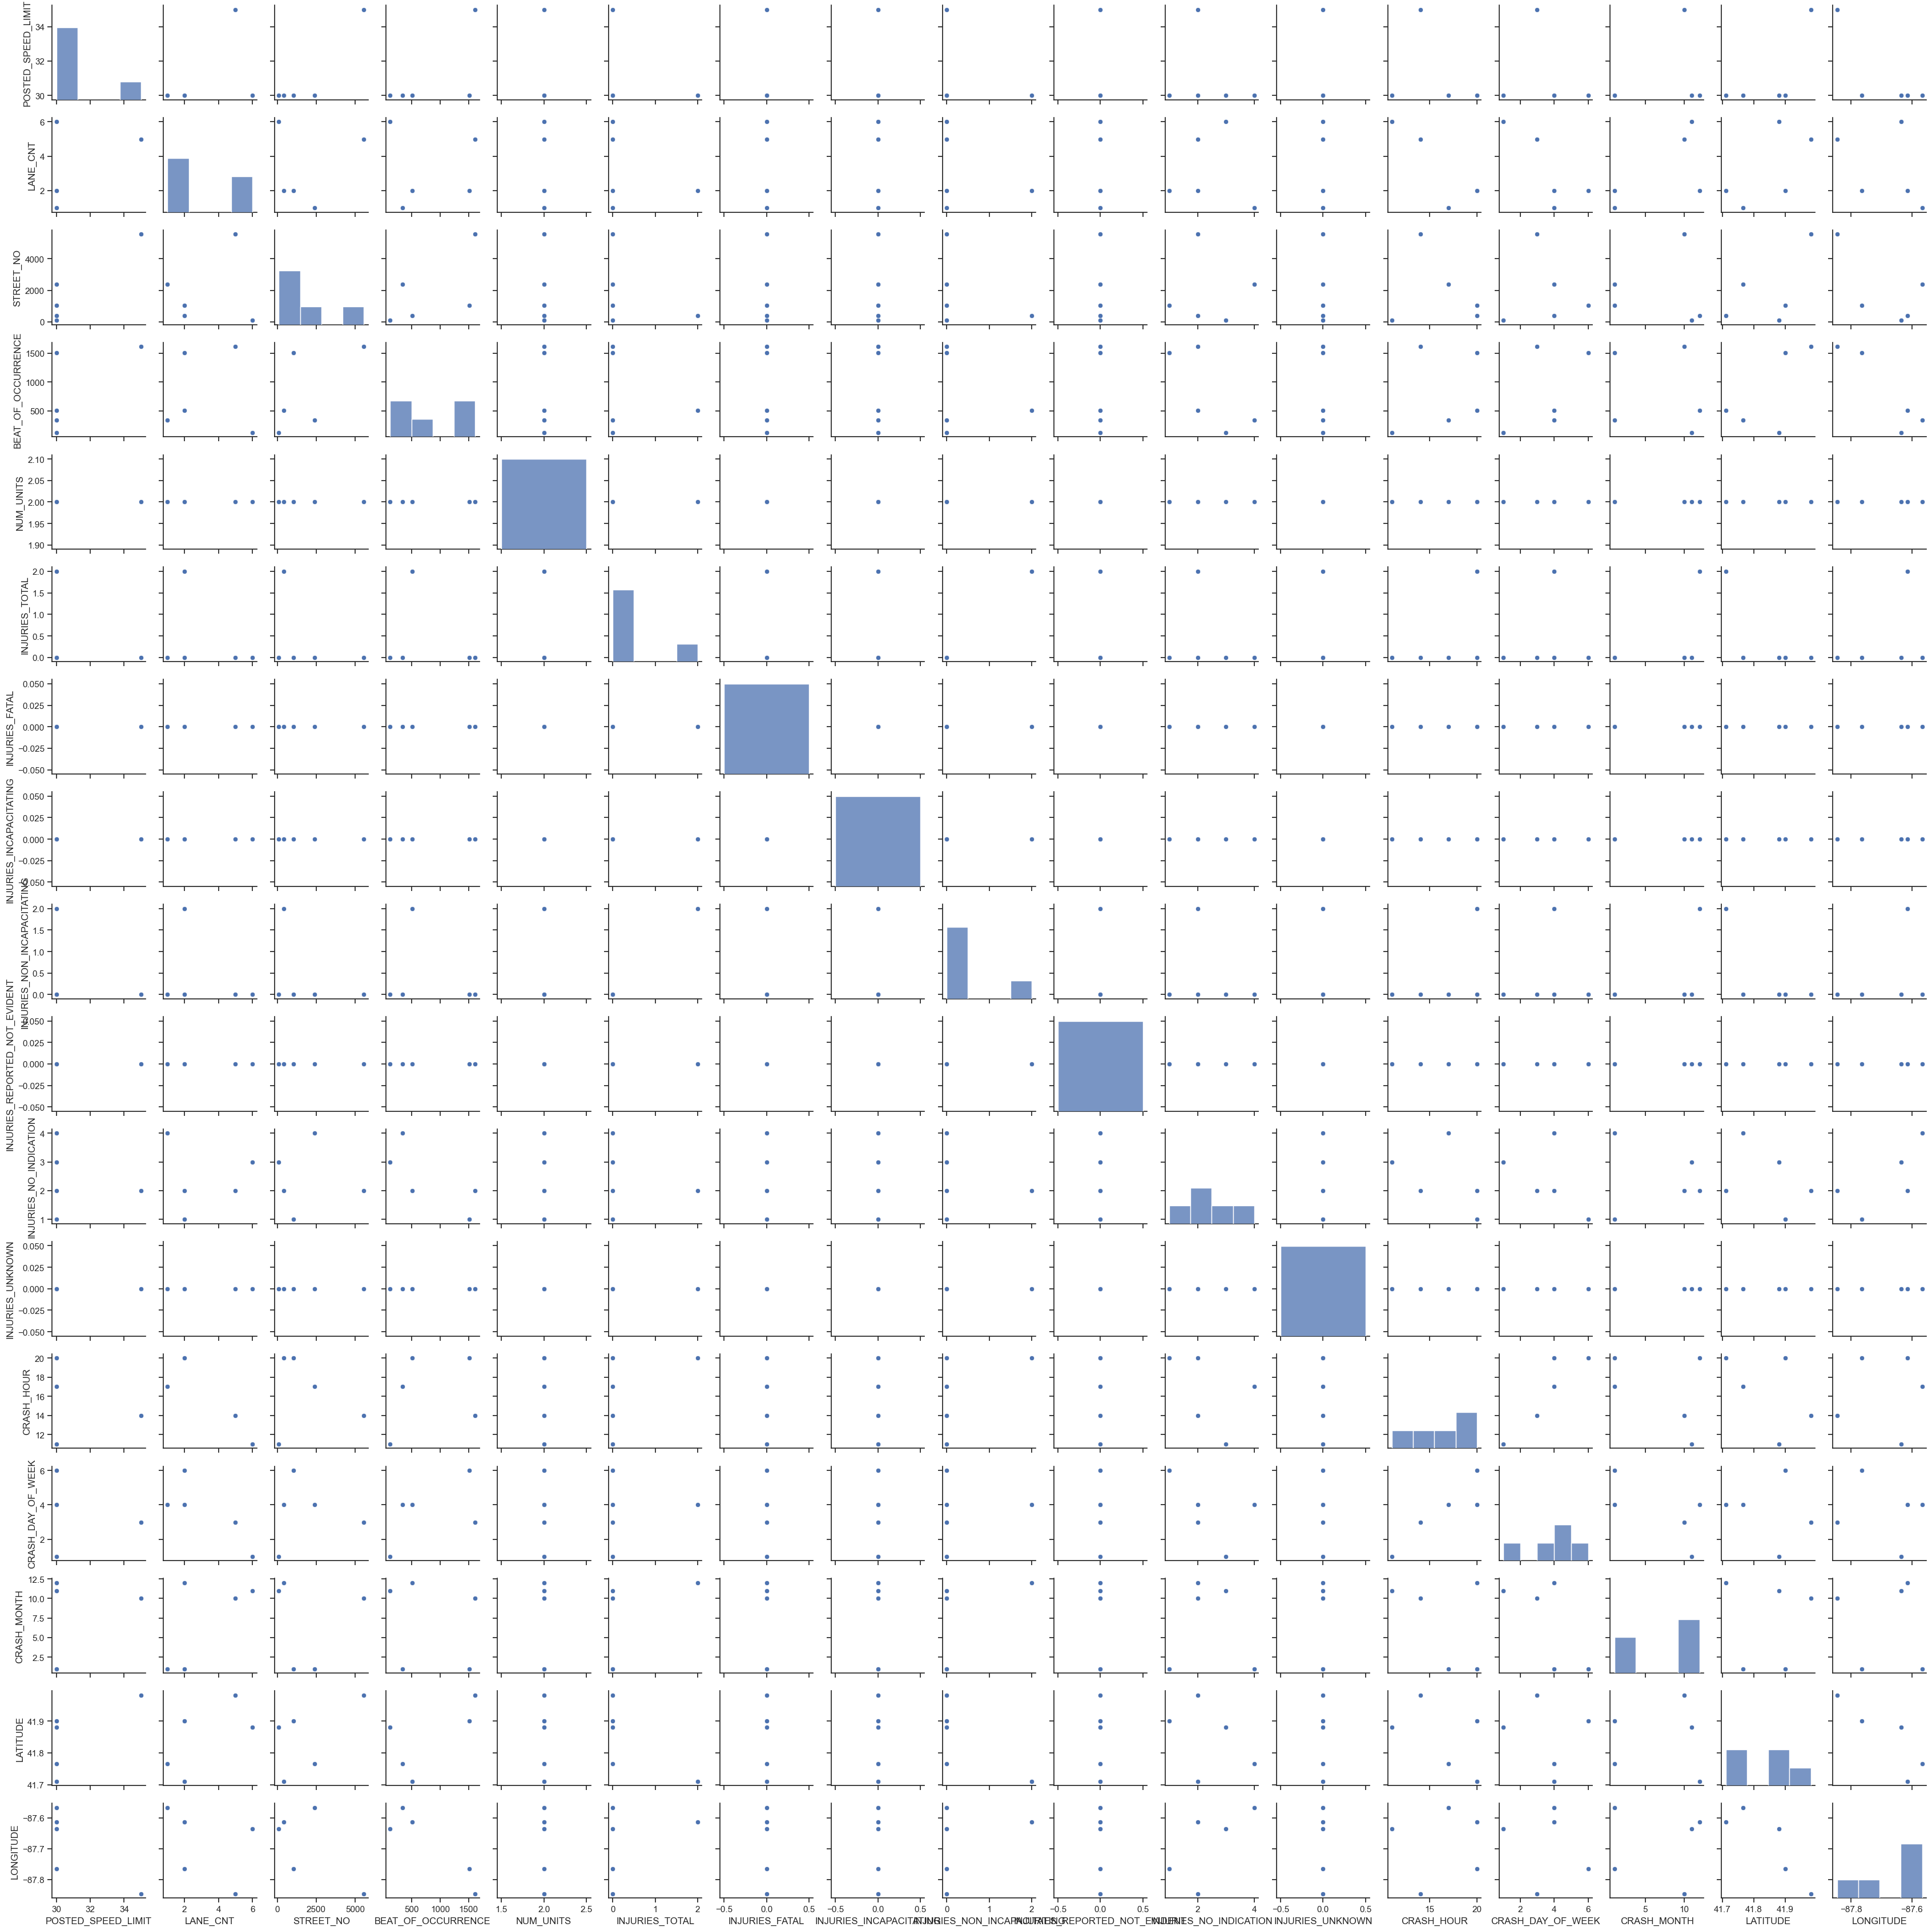

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only the numerical features for scatter plots
numerical_features = ['POSTED_SPEED_LIMIT', 'LANE_CNT', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
                      'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
                      'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN',
                      'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'CRASH_YEAR']

# Create scatter plots
plt.figure(figsize=(15, 15))
sns.set(style="ticks")

# Pair plots for numerical features
sns.pairplot(df_Crashes[numerical_features].dropna(), height=2, markers='o')

# Adjust layout to avoid warning
plt.tight_layout()

# Show the plot
plt.show()

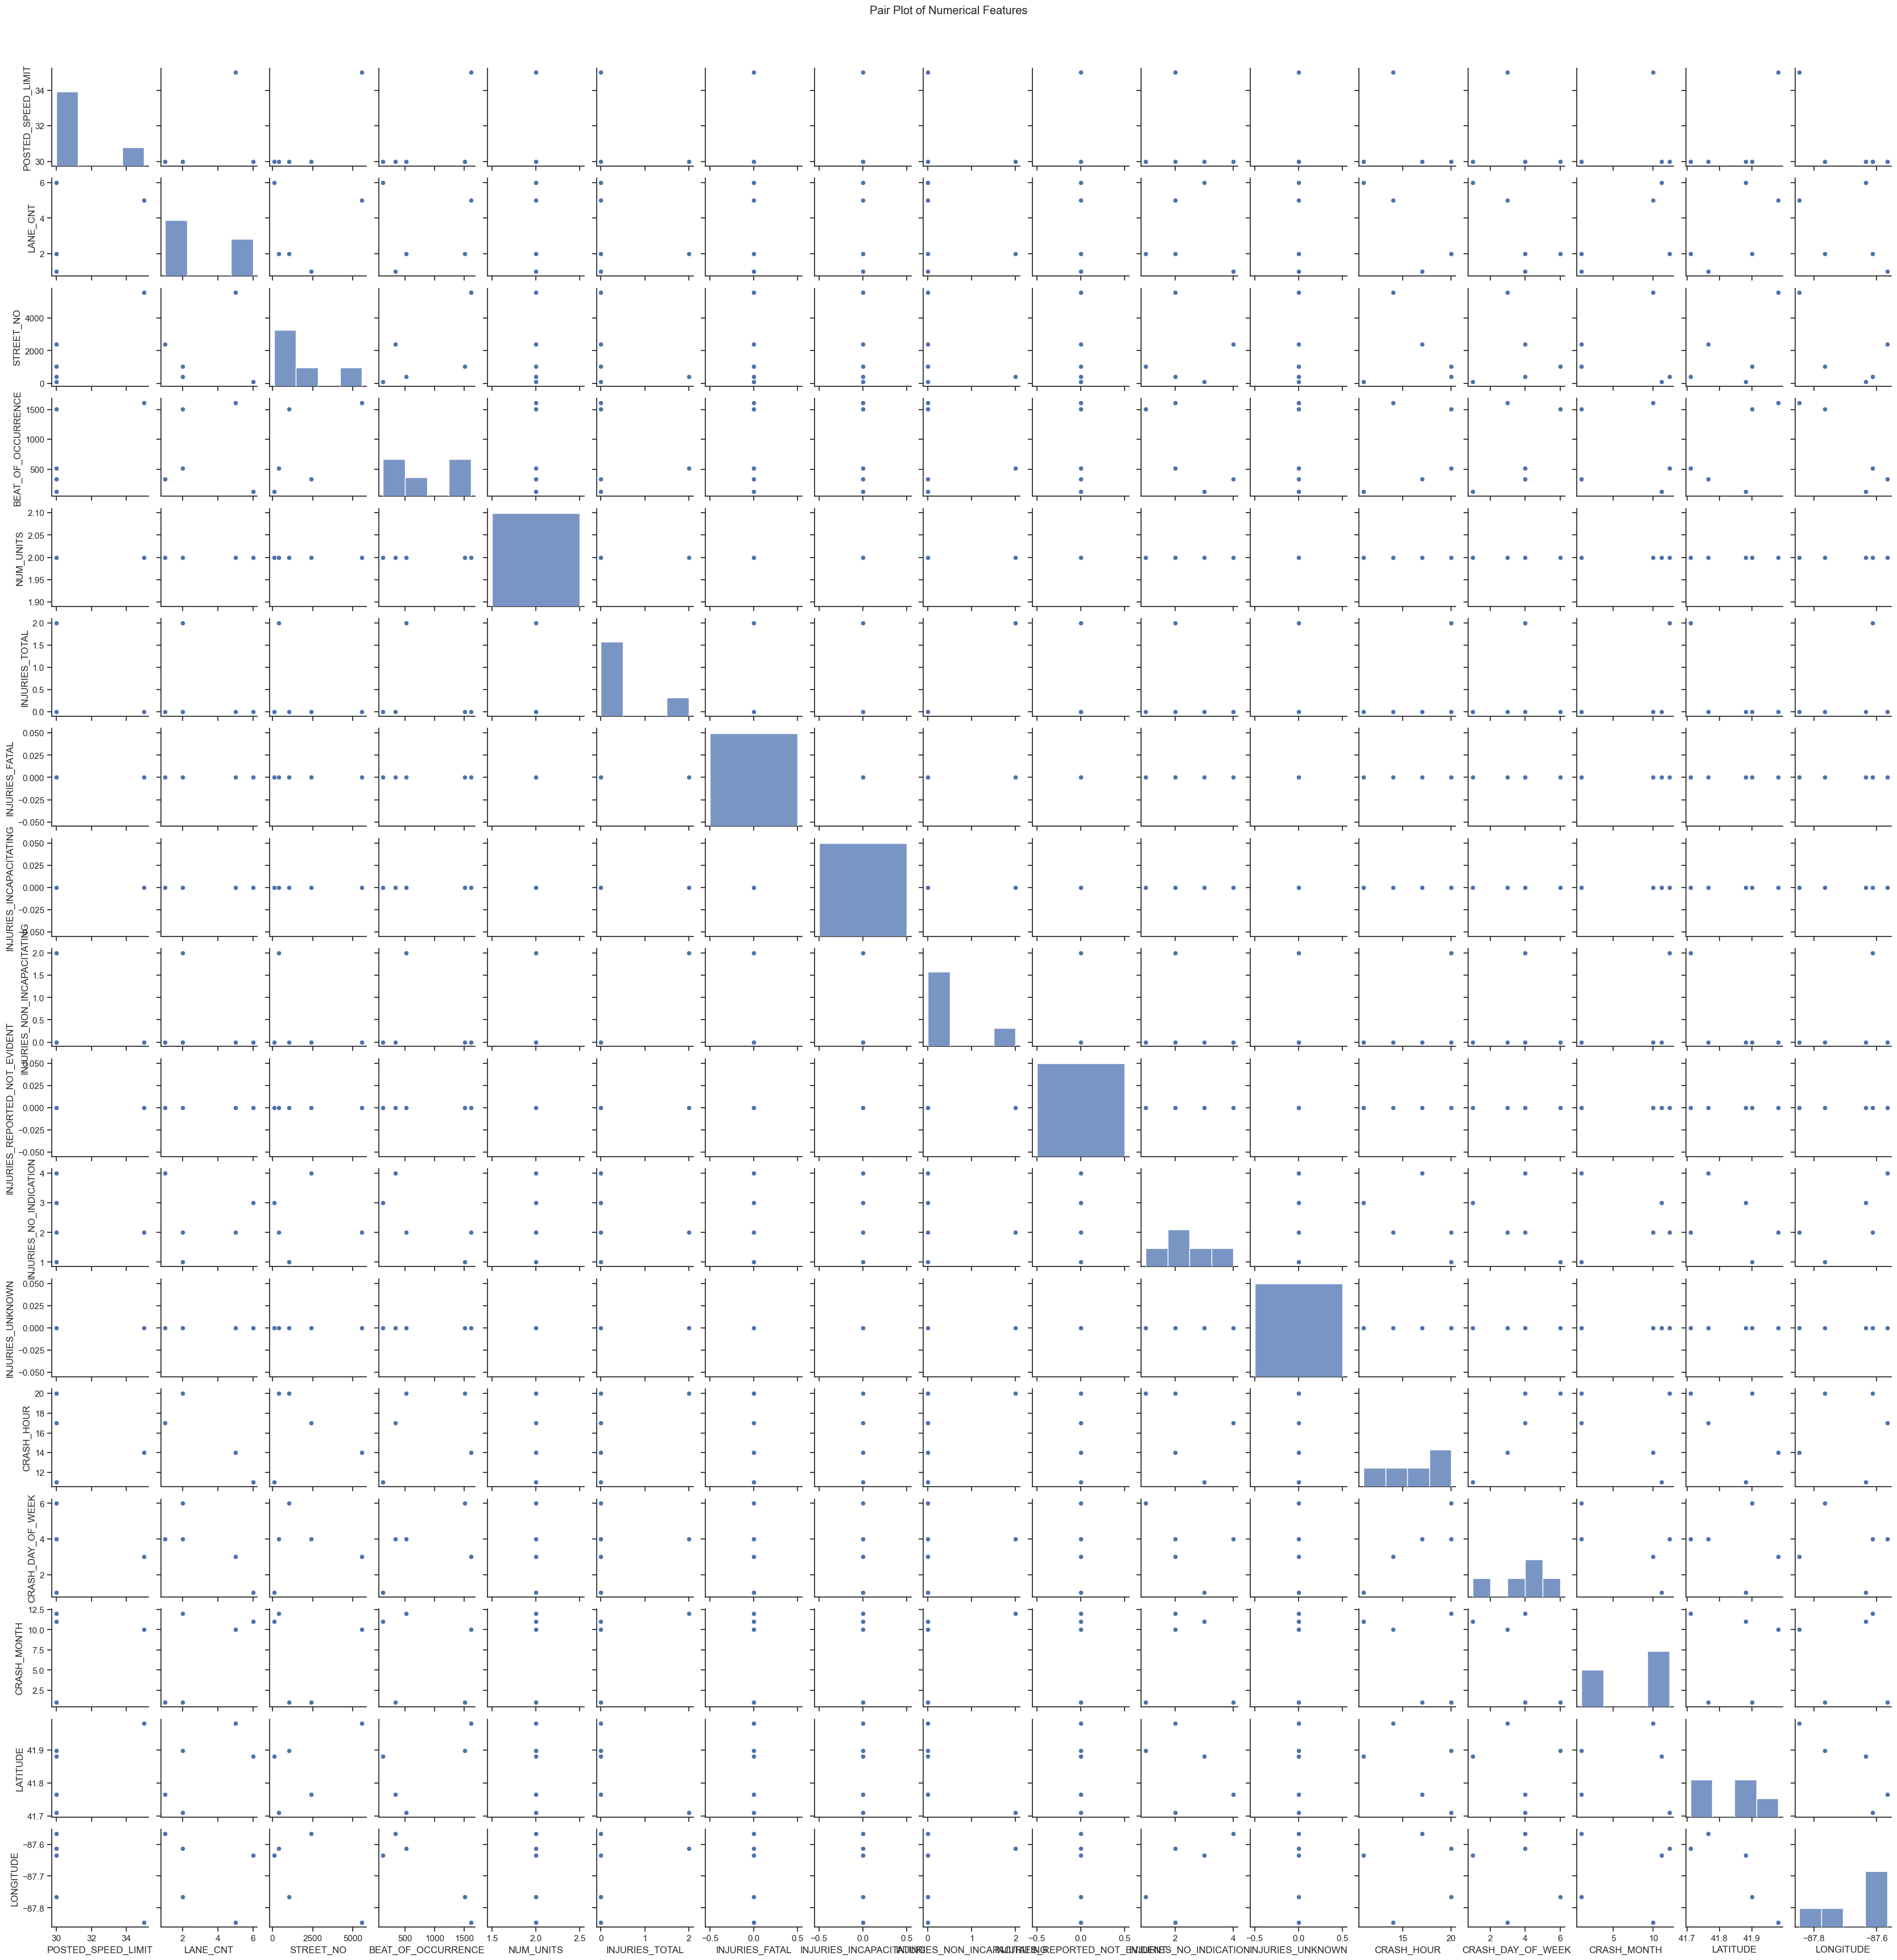

In [23]:
# Selecting only the numerical features for Pair plot
numerical_features = ['POSTED_SPEED_LIMIT', 'LANE_CNT', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
                      'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
                      'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN',
                      'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'CRASH_YEAR']

# Pair Plot
sns.set(style="ticks")
sns.pairplot(df_Crashes[numerical_features].dropna(), height=2, markers='o')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

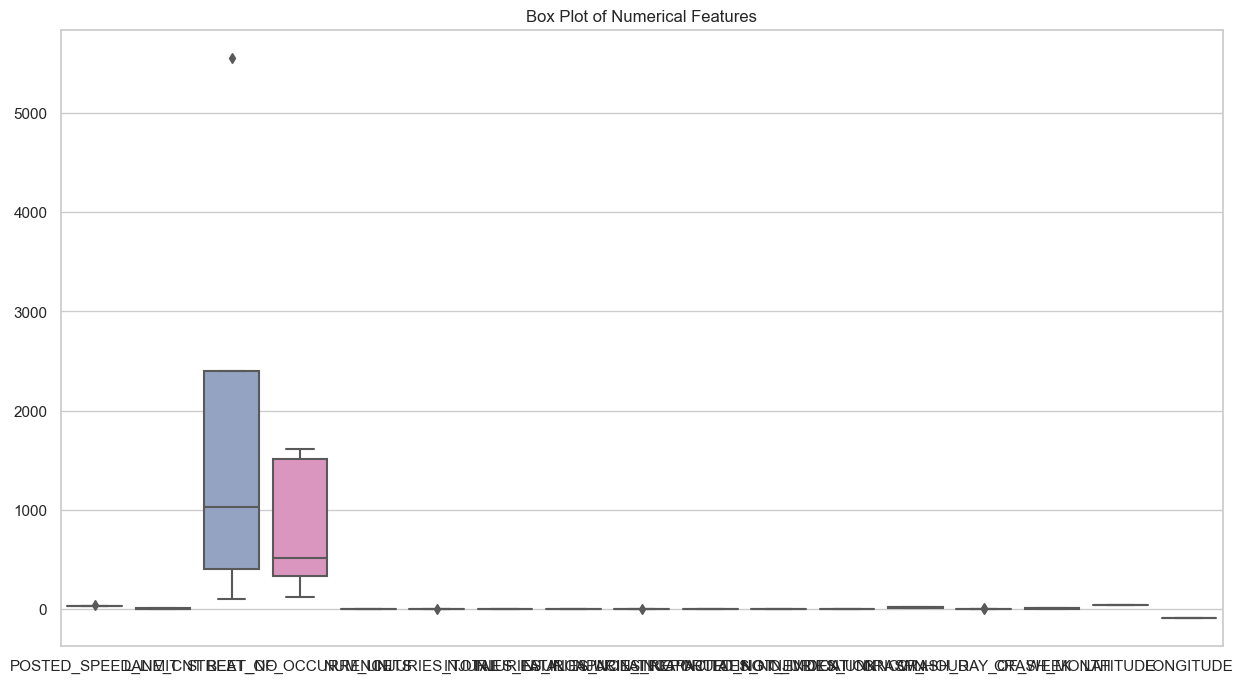

In [24]:
# Selecting only the numerical features for Box PLot
numerical_features = ['POSTED_SPEED_LIMIT', 'LANE_CNT', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
                      'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
                      'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN',
                      'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE']

# Box Plot
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
sns.boxplot(data=df_Crashes[numerical_features].dropna(), orient="v", palette="Set2")
plt.title('Box Plot of Numerical Features')
plt.show()


## Data Cleaning & Preprocessing

In [25]:
# Dropping columns with missing data
columns_drop = ['WORKERS_PRESENT_I', 'DOORING_I', 'WORK_ZONE_TYPE', 'WORK_ZONE_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'NOT_RIGHT_OF_WAY_I', 'CRASH_DATE_EST_I']
df_droppedCrashes = df_Crashes.drop(columns=columns_drop)
df_droppedCrashes.head(5)

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CRASH_YEAR
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,2023-09-05 19:05:00,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",NaN,...,0.0,2.0,0.0,19.0,3.0,9.0,NaN,NaN,NaN,2023.0
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,2023-09-22 18:45:00,50.0,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,0.0,2.0,0.0,18.0,6.0,9.0,NaN,NaN,NaN,2023.0
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,2023-07-29 14:45:00,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,0.0,1.0,0.0,14.0,7.0,7.0,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952),2023.0
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,2023-08-09 23:00:00,30.0,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,NaN,...,0.0,2.0,0.0,23.0,4.0,8.0,NaN,NaN,NaN,2023.0
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,2023-08-18 12:50:00,15.0,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,NaN,...,0.0,1.0,0.0,12.0,6.0,8.0,NaN,NaN,NaN,2023.0


In [26]:
# Reviewing the columns (in percentage of missing values) after dropping
new_missing_crashesval = (df_droppedCrashes.isnull().sum() / len(df_droppedCrashes)) * 100
new_missing_crashesval

CRASH_RECORD_ID                   0.000000
CRASH_DATE                        0.000000
POSTED_SPEED_LIMIT                0.000000
TRAFFIC_CONTROL_DEVICE            0.000000
DEVICE_CONDITION                  0.000000
WEATHER_CONDITION                 0.000000
LIGHTING_CONDITION                0.000000
FIRST_CRASH_TYPE                  0.000000
TRAFFICWAY_TYPE                   0.000000
LANE_CNT                         99.992829
ALIGNMENT                         0.000000
ROADWAY_SURFACE_COND              0.000000
ROAD_DEFECT                       0.000000
REPORT_TYPE                       4.383575
CRASH_TYPE                        0.000000
INTERSECTION_RELATED_I           76.786653
HIT_AND_RUN_I                    66.186242
DAMAGE                            0.000000
DATE_POLICE_NOTIFIED              0.000000
PRIM_CONTRIBUTORY_CAUSE           0.000000
SEC_CONTRIBUTORY_CAUSE            0.000000
STREET_NO                         0.000000
STREET_DIRECTION                  0.000000
STREET_NAME

In [27]:
# Calculate the threshold for 90% missing values - in case we missed a row
threshold = 0.9 * len(df_Crashes)

# Drop columns with more than 90% missing values
Crashes_cleaned = df_droppedCrashes.dropna(thresh=threshold, axis=1)

# Display the remaining columns
print("Remaining columns:")
print(Crashes_cleaned.columns)

Remaining columns:
Index(['CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'CRASH_YEAR'],
      dtype='object')


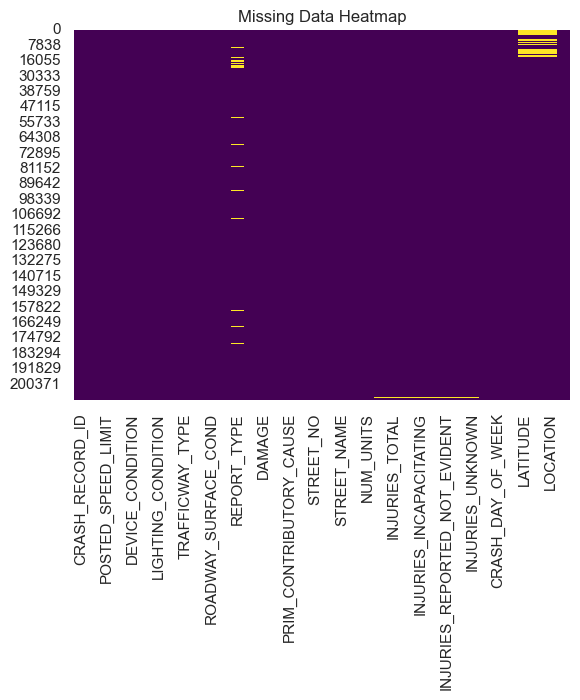

In [28]:
# Create a heatmap to show missing values
sns.heatmap(Crashes_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [29]:
Crashes_cleaned.shape # We'll use this dataset to merge

(83676, 38)

## Vehicles Dataset - Exploration & Understanding

### Structure of Vehicles Dataset

In [30]:
#Checking the column names, data types, and basic structure
df_Vehicles.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1727162,f5943b05f46b8d4148a63b7506a59113eae0cf1075aabc...,12/21/2023 08:57:00 AM,2,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,NaN,1634931.0,NaN,NISSAN,SENTRA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,12/06/2023 04:00:00 PM,2,DRIVER,NaN,1634978.0,NaN,CHRYSLER,SEBRING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,12/06/2023 04:30:00 PM,1,DRIVER,NaN,1634948.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,1,DRIVER,NaN,1637401.0,NaN,TOYOTA,RAV4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Checking for any potential inconsistencies or errors at the end of the data
df_Vehicles.tail()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
1640444,1748917,eaeb16baf471763bc619d64e1049eff9f6484772c9bbc4...,01/22/2024 04:40:00 PM,2,DRIVER,NaN,1665112.0,NaN,KIA,TELLURIDE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1640445,1749397,b4208b72bd9978642fc85c02b2bedbcf1bfb082ec76731...,01/22/2024 09:30:00 AM,1,DRIVER,NaN,1665562.0,NaN,UNKNOWN,OTHER (EXPLAIN IN NARRATIVE),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1640446,1749922,4c206037ed42a033ce69d8291c26be02a44f6500fbc0ce...,01/22/2024 08:47:00 PM,1,DRIVER,NaN,1666071.0,NaN,LEXUS,RX350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1640447,1749923,4c206037ed42a033ce69d8291c26be02a44f6500fbc0ce...,01/22/2024 08:47:00 PM,2,DRIVER,NaN,1666079.0,NaN,TOYOTA,SIENNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1640448,1754458,4b371f0b4bcaf9a3117bd0d4f35f984ea0cf5fb8d3781c...,02/06/2024 02:37:00 AM,1,DRIVER,NaN,1670473.0,NaN,UNKNOWN,OTHER (EXPLAIN IN NARRATIVE),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Representation of data seems to be consistent between to head() and the tail()

In [32]:
#Summary of the DataFrame:column names, data types,data shape, non-null counts, memory usage, and other characteristics.
df_Vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640449 entries, 0 to 1640448
Data columns (total 71 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1640449 non-null  int64  
 1   CRASH_RECORD_ID           1640449 non-null  object 
 2   CRASH_DATE                1640449 non-null  object 
 3   UNIT_NO                   1640449 non-null  int64  
 4   UNIT_TYPE                 1638343 non-null  object 
 5   NUM_PASSENGERS            242654 non-null   float64
 6   VEHICLE_ID                1602902 non-null  float64
 7   CMRC_VEH_I                30550 non-null    object 
 8   MAKE                      1602897 non-null  object 
 9   MODEL                     1602752 non-null  object 
 10  LIC_PLATE_STATE           1455956 non-null  object 
 11  VEHICLE_YEAR              1344942 non-null  float64
 12  VEHICLE_DEFECT            1602902 non-null  object 
 13  VEHICLE_TYPE              1

In [33]:
# Checking for central tendency, spread, and potential outliers in numerical data
df_Vehicles.describe()

,CRASH_UNIT_ID,UNIT_NO,NUM_PASSENGERS,VEHICLE_ID,VEHICLE_YEAR,OCCUPANT_CNT,CMV_ID,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT
count,1.640449e+06,1.640449e+06,242654.000000,1.602902e+06,1.344942e+06,1.602902e+06,16757.000000,2328.000000,67.000000,2834.000000,4247.000000
mean,8.772532e+05,3.867779e+00,1.470567,8.343572e+05,2.013988e+03,1.078775e+00,9347.536015,48.478952,44.656716,53.187368,9.834707
std,5.080608e+05,2.949745e+03,1.059266,4.818147e+05,1.385008e+02,7.826056e-01,5407.642163,20.898747,28.094296,31.413716,399.054134
min,2.000000e+00,0.000000e+00,1.000000,2.000000e+00,1.900000e+03,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.362560e+05,1.000000e+00,1.000000,4.174682e+05,2.007000e+03,1.000000e+00,4619.000000,45.000000,24.500000,35.000000,2.000000
50%,8.780450e+05,2.000000e+00,1.000000,8.330485e+05,2.013000e+03,1.000000e+00,9372.000000,53.000000,50.000000,53.000000,3.000000
75%,1.317385e+06,2.000000e+00,2.000000,1.250758e+06,2.016000e+03,1.000000e+00,14052.000000,53.000000,53.000000,66.000000,5.000000
max,1.754981e+06,3.778035e+06,59.000000,1.670968e+06,9.999000e+03,9.900000e+01,18663.000000,740.000000,123.000000,999.000000,26009.000000


#### Indicate observation

In [34]:
# Checking the value count of the data types
print("Data types: ","\n", df_Vehicles.dtypes.value_counts())

Data types:  
 object     60
float64     9
int64       2
Name: count, dtype: int64


In [35]:
df_Vehicles.value_counts()

Series([], Name: count, dtype: int64)

In [36]:
#Convert 'CRASH_DATE' to datetime format
df_Vehicles['CRASH_DATE'] = pd.to_datetime(df_Vehicles['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')

In [37]:
# Extract year from 'CRASH_DATE' and create a new column 'CRASH_YEAR'
df_Vehicles['CRASH_YEAR'] = df_Vehicles['CRASH_DATE'].dt.year

In [38]:
#rexamining the structure
df_Vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640449 entries, 0 to 1640448
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   CRASH_UNIT_ID             1640449 non-null  int64         
 1   CRASH_RECORD_ID           1640449 non-null  object        
 2   CRASH_DATE                1640449 non-null  datetime64[ns]
 3   UNIT_NO                   1640449 non-null  int64         
 4   UNIT_TYPE                 1638343 non-null  object        
 5   NUM_PASSENGERS            242654 non-null   float64       
 6   VEHICLE_ID                1602902 non-null  float64       
 7   CMRC_VEH_I                30550 non-null    object        
 8   MAKE                      1602897 non-null  object        
 9   MODEL                     1602752 non-null  object        
 10  LIC_PLATE_STATE           1455956 non-null  object        
 11  VEHICLE_YEAR              1344942 non-null  float6

In [39]:
# filtering the df_Vehicles DataFrame to retain only rows from the years 2021, 2022, and 2023.
df_Vehicles = df_Vehicles[df_Vehicles['CRASH_YEAR'].isin([2021, 2022, 2023])]

### Checking for Duplicates

In [40]:
# Checking for duplicates 
duplicates = df_Vehicles.duplicated()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

# Display the duplicate rows
duplicate_rows = df_Vehicles[duplicates]
print("Duplicate Rows:")
print(duplicate_rows)

Number of duplicate rows: 0
Duplicate Rows:
Empty DataFrame
Columns: [CRASH_UNIT_ID, CRASH_RECORD_ID, CRASH_DATE, UNIT_NO, UNIT_TYPE, NUM_PASSENGERS, VEHICLE_ID, CMRC_VEH_I, MAKE, MODEL, LIC_PLATE_STATE, VEHICLE_YEAR, VEHICLE_DEFECT, VEHICLE_TYPE, VEHICLE_USE, TRAVEL_DIRECTION, MANEUVER, TOWED_I, FIRE_I, OCCUPANT_CNT, EXCEED_SPEED_LIMIT_I, TOWED_BY, TOWED_TO, AREA_00_I, AREA_01_I, AREA_02_I, AREA_03_I, AREA_04_I, AREA_05_I, AREA_06_I, AREA_07_I, AREA_08_I, AREA_09_I, AREA_10_I, AREA_11_I, AREA_12_I, AREA_99_I, FIRST_CONTACT_POINT, CMV_ID, USDOT_NO, CCMC_NO, ILCC_NO, COMMERCIAL_SRC, GVWR, CARRIER_NAME, CARRIER_STATE, CARRIER_CITY, HAZMAT_PLACARDS_I, HAZMAT_NAME, UN_NO, HAZMAT_PRESENT_I, HAZMAT_REPORT_I, HAZMAT_REPORT_NO, MCS_REPORT_I, MCS_REPORT_NO, HAZMAT_VIO_CAUSE_CRASH_I, MCS_VIO_CAUSE_CRASH_I, IDOT_PERMIT_NO, WIDE_LOAD_I, TRAILER1_WIDTH, TRAILER2_WIDTH, TRAILER1_LENGTH, TRAILER2_LENGTH, TOTAL_VEHICLE_LENGTH, AXLE_CNT, VEHICLE_CONFIG, CARGO_BODY_TYPE, LOAD_TYPE, HAZMAT_OUT_OF_SERVICE

##### The Vehicles dataset does not contain any identical rows, and each row is unique based on the columns considered. This is a good sign, as it suggests that there are no exact duplicates in this dataset

### Checking for missing data

In [41]:
# Calculating percentage of missing values
missing_vehicles = (df_Vehicles.isnull().sum() / len(df_Vehicles)) * 100
missing_vehicles

CRASH_UNIT_ID               0.000000
CRASH_RECORD_ID             0.000000
CRASH_DATE                  0.000000
UNIT_NO                     0.000000
UNIT_TYPE                   0.100691
                             ...    
LOAD_TYPE                  99.280095
HAZMAT_OUT_OF_SERVICE_I    99.344239
MCS_OUT_OF_SERVICE_I       99.335885
HAZMAT_CLASS               99.943762
CRASH_YEAR                  0.000000
Length: 72, dtype: float64

In [42]:
# Create a DataFrame to display missing value statistics
missingstat_vehicles = pd.DataFrame({'Column': df_Vehicles.columns, 'Missing Percentage': missing_vehicles})
missingstat_vehicles = missingstat_vehicles.sort_values(by='Missing Percentage', ascending=False)
print(missingstat_vehicles)

                                    Column  Missing Percentage
HAZMAT_REPORT_NO          HAZMAT_REPORT_NO           99.999851
MCS_REPORT_NO                MCS_REPORT_NO           99.999702
EXCEED_SPEED_LIMIT_I  EXCEED_SPEED_LIMIT_I           99.998657
TRAILER2_LENGTH            TRAILER2_LENGTH           99.997017
HAZMAT_NAME                    HAZMAT_NAME           99.997017
...                                    ...                 ...
CRASH_UNIT_ID                CRASH_UNIT_ID            0.000000
CRASH_RECORD_ID            CRASH_RECORD_ID            0.000000
UNIT_NO                            UNIT_NO            0.000000
CRASH_DATE                      CRASH_DATE            0.000000
CRASH_YEAR                      CRASH_YEAR            0.000000

[72 rows x 2 columns]


In [43]:
#Getting a longer list
# Set a threshold for missing percentage (adjust as needed)
missing_threshold = 15

# Calculate missing percentages for each column
missing_percentages = (df_Vehicles.isnull().sum() / len(df_Vehicles)) * 100

# Create a DataFrame to display missing value statistics
missing_vehicles = pd.DataFrame({'Column': df_Vehicles.columns, 'Missing Percentage': missing_percentages})

# Filter columns based on the threshold
missing_vehicles = missing_vehicles[missing_vehicles['Missing Percentage'] > missing_threshold]

# Sort the DataFrame by missing percentage in descending order
missing_vehicles = missing_vehicles.sort_values(by='Missing Percentage', ascending=False)

# Print the DataFrame
print(missing_vehicles)

                                            Column  Missing Percentage
HAZMAT_REPORT_NO                  HAZMAT_REPORT_NO           99.999851
MCS_REPORT_NO                        MCS_REPORT_NO           99.999702
EXCEED_SPEED_LIMIT_I          EXCEED_SPEED_LIMIT_I           99.998657
HAZMAT_NAME                            HAZMAT_NAME           99.997017
TRAILER2_LENGTH                    TRAILER2_LENGTH           99.997017
WIDE_LOAD_I                            WIDE_LOAD_I           99.992094
TRAILER2_WIDTH                      TRAILER2_WIDTH           99.984934
HAZMAT_PLACARDS_I                HAZMAT_PLACARDS_I           99.983144
UN_NO                                        UN_NO           99.972701
IDOT_PERMIT_NO                      IDOT_PERMIT_NO           99.955248
HAZMAT_CLASS                          HAZMAT_CLASS           99.943762
ILCC_NO                                    ILCC_NO           99.936602
TRAILER1_LENGTH                    TRAILER1_LENGTH           99.911243
FIRE_I

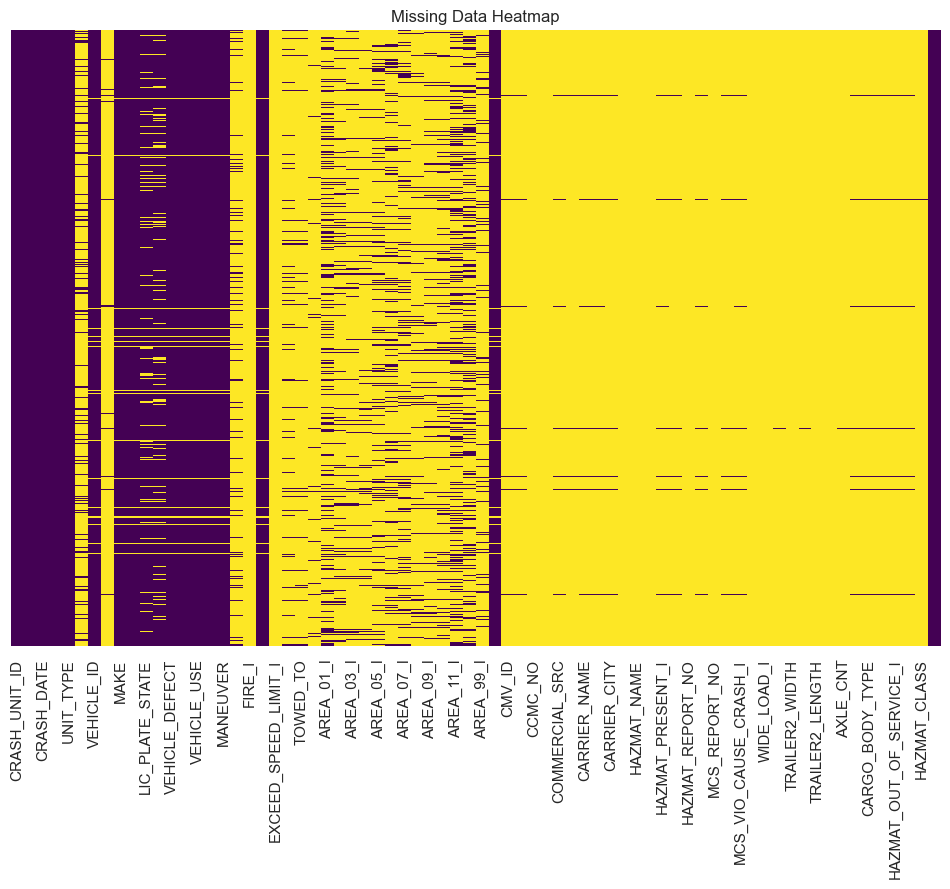

In [44]:
# Creating a heatmap of the missing values above
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(df_Vehicles.isnull(), cbar=False, cmap='viridis', yticklabels=False)  # Adjusting yticklabels to False
plt.title('Missing Data Heatmap')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)  # Adding grid lines
plt.show()

#### Observations:
1. HAZMAT_REPORT_NO                  HAZMAT_REPORT_NO           99.999939
MCS_REPORT_NO                        MCS_REPORT_NO           99.999573
HAZMAT_NAME                            HAZMAT_NAME           99.996403
TRAILER2_LENGTH                    TRAILER2_LENGTH           99.995916
WIDE_LOAD_I                            WIDE_LOAD_I           99.991100
HAZMAT_PLACARDS_I                HAZMAT_PLACARDS_I           99.980249
TRAILER2_WIDTH                      TRAILER2_WIDTH           99.979152
UN_NO      99.965558
IDOT_PERMIT_NO               99.944588
HAZMAT_CLASS                       99.934103
FIRE_I                        99.918010
ILCC_NO                       99.915206
CCMC_NO                            99.877412
TRAILER1_LENGTH                 99.858088
EXCEED_SPEED_LIMIT_I            99.853881
TOTAL_VEHICLE_LENGTH               99.827242
TRAILER1_WIDTH                  99.824438
AXLE_CNT                     99.741107
GVWR                              99.429668
USDOT_NO                         99.424792
COMMERCIAL_SRC             99.320003
HAZMAT_OUT_OF_SERVICE_I           99.296900
MCS_OUT_OF_SERVICE_I           99.281660
MCS_VIO_CAUSE_CRASH_I                   99.278185
HAZMAT_REPORT_I                        99.275625
MCS_REPORT_I                           99.272699
HAZMAT_VIO_CAUSE_CRASH_I           99.265689
HAZMAT_PRESENT_I                 99.254838
LOAD_TYPE                                99.226309
CARGO_BODY_TYPE        99.191075
VEHICLE_CONFIG                    99.153281
CARRIER_CITY                       99.101222
CARRIER_STATE                     99.083726
CARRIER_NAME                          CARRIER_NAME           99.023621
CMV_ID                             98.978511
CMRC_VEH_I                          98.137705
AREA_00_I                            96.550030
TOWED_TO                      94.281017
AREA_09_I                             93.350113
TOWED_BY                                  TOWED_BY           90.693585
AREA_04_I                           90.447615
AREA_03_I                               90.427255
AREA_10_I                          90.323381
AREA_99_I                              88.737900
TOWED_I                              87.617354
AREA_08_I                            85.708486
AREA_07_I                                     85.572060
NUM_PASSENGERS                          85.208074
AREA_05_I                               85.157234
AREA_06_I                           84.378362
AREA_02_I                            84.121298
AREA_12_I                               81.615643
AREA_11_I                                  81.225567
AREA_01_I

### Visualizing the counts of different categories

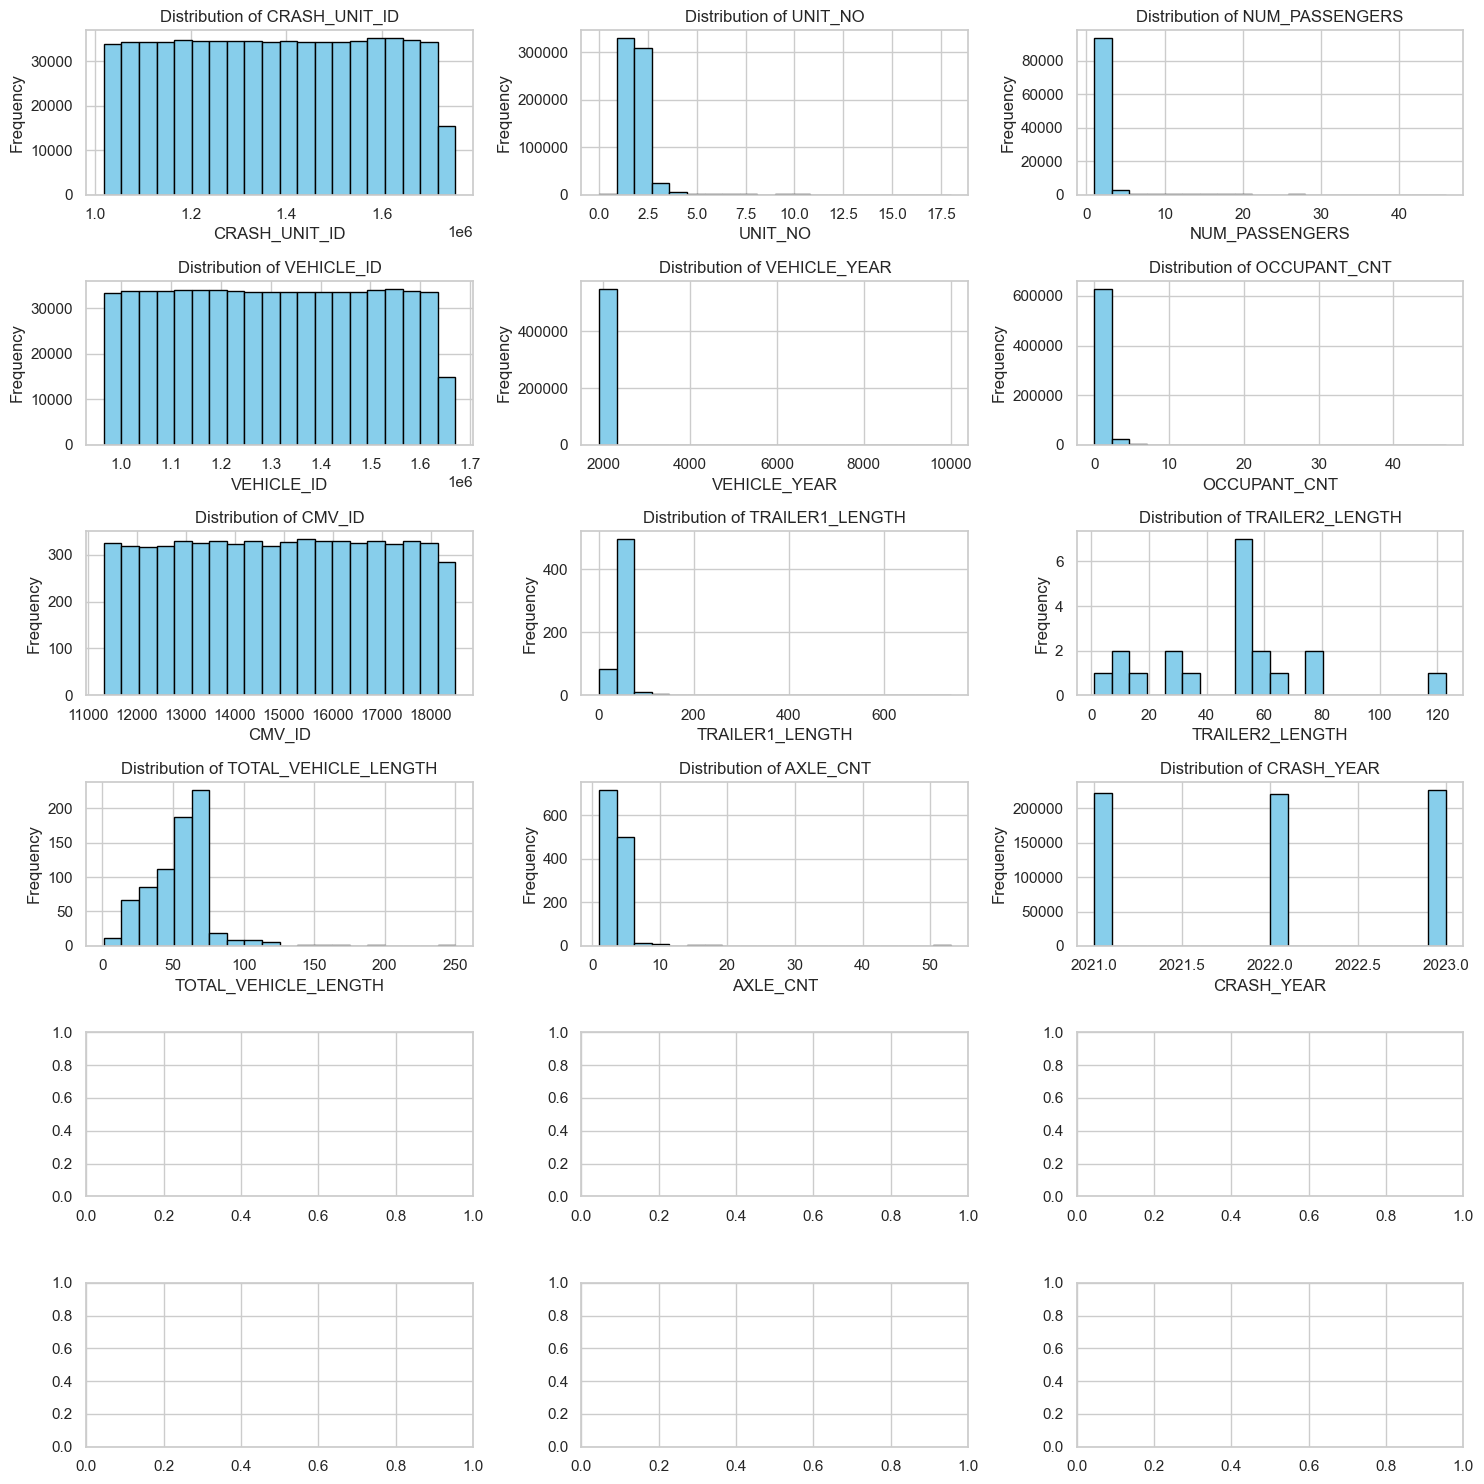

In [45]:
# Using Histograms to check the distribution of the numerical features
# Selecting only the numerical features for the histogram
numerical_features = ['CRASH_UNIT_ID', 'UNIT_NO', 'NUM_PASSENGERS', 'VEHICLE_ID', 'VEHICLE_YEAR', 'OCCUPANT_CNT',
                      'CMV_ID', 'TRAILER1_LENGTH', 'TRAILER2_LENGTH', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT', 'CRASH_YEAR']

# Create subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    axes[i].hist(df_Vehicles[feature].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

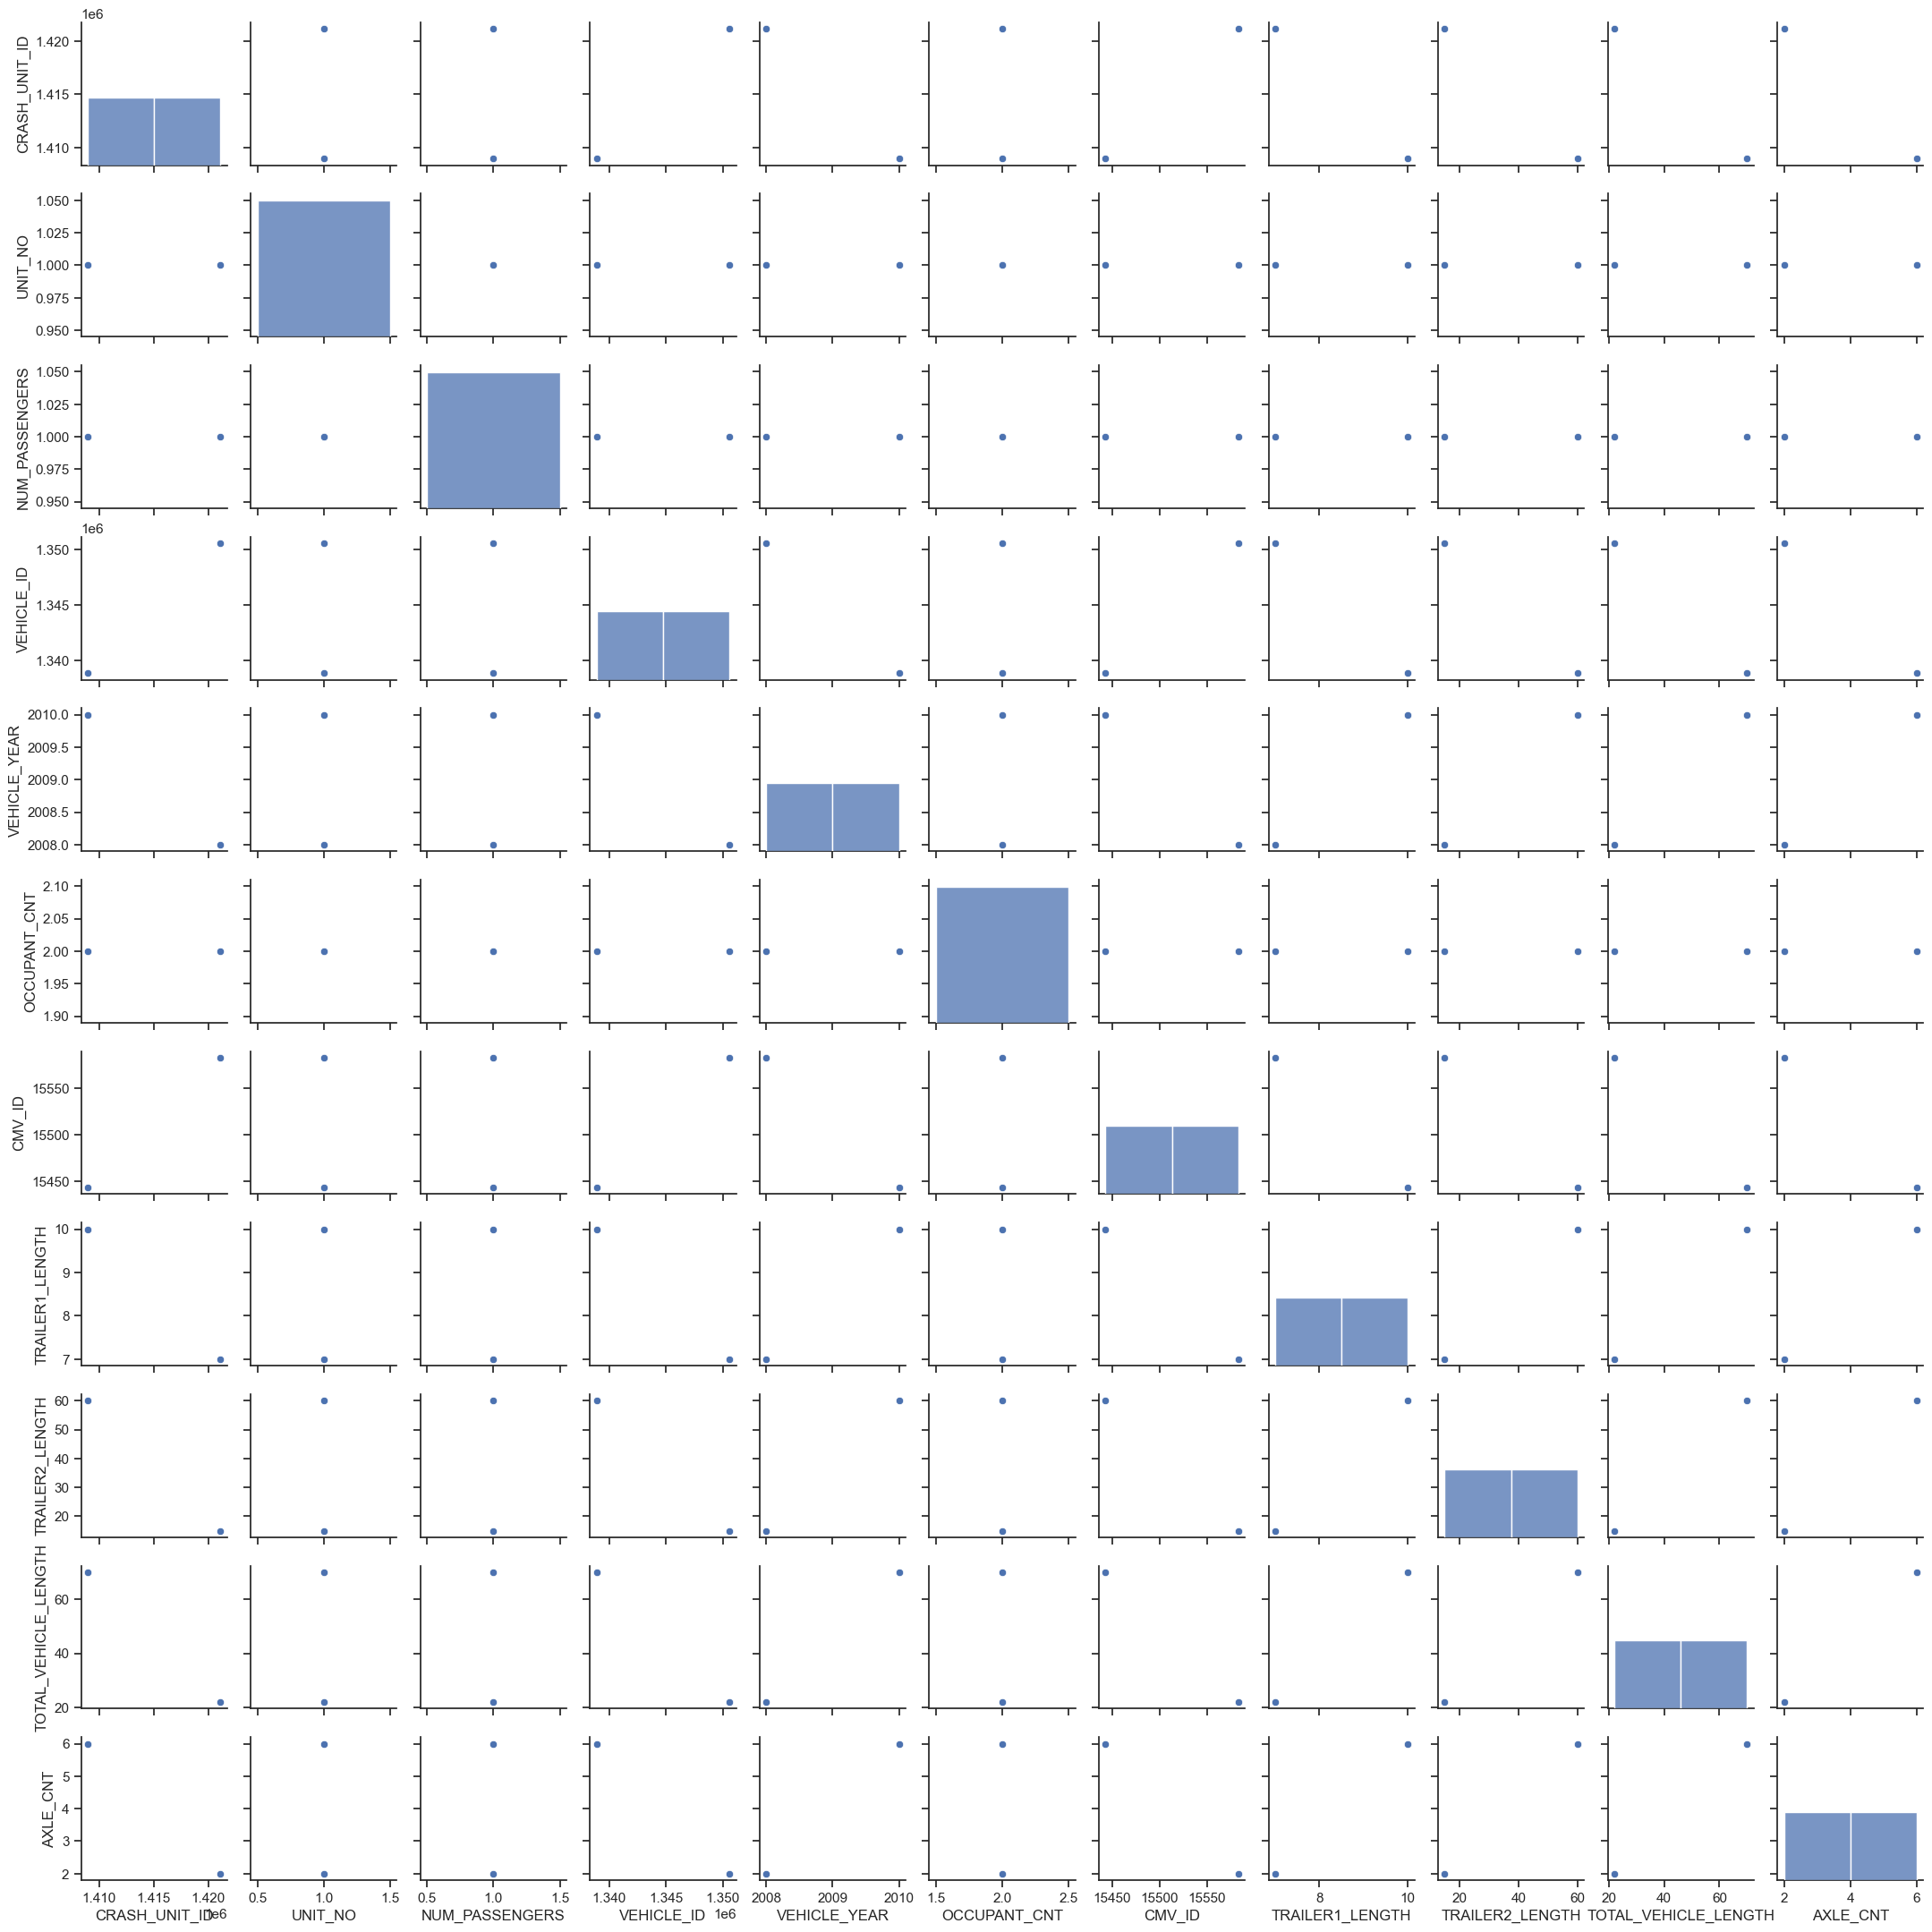

In [46]:
# Selecting only the numerical features for scatter plots
numerical_features = ['CRASH_UNIT_ID', 'UNIT_NO', 'NUM_PASSENGERS', 'VEHICLE_ID', 'VEHICLE_YEAR', 'OCCUPANT_CNT',
                      'CMV_ID', 'TRAILER1_LENGTH', 'TRAILER2_LENGTH', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT', 'CRASH_YEAR']]

# Create scatter plots
plt.figure(figsize=(15, 15))
sns.set(style="ticks")

# Pair plots for numerical features
sns.pairplot(df_Vehicles[numerical_features].dropna(), height=2, markers='o')

# Show the plot
plt.show()

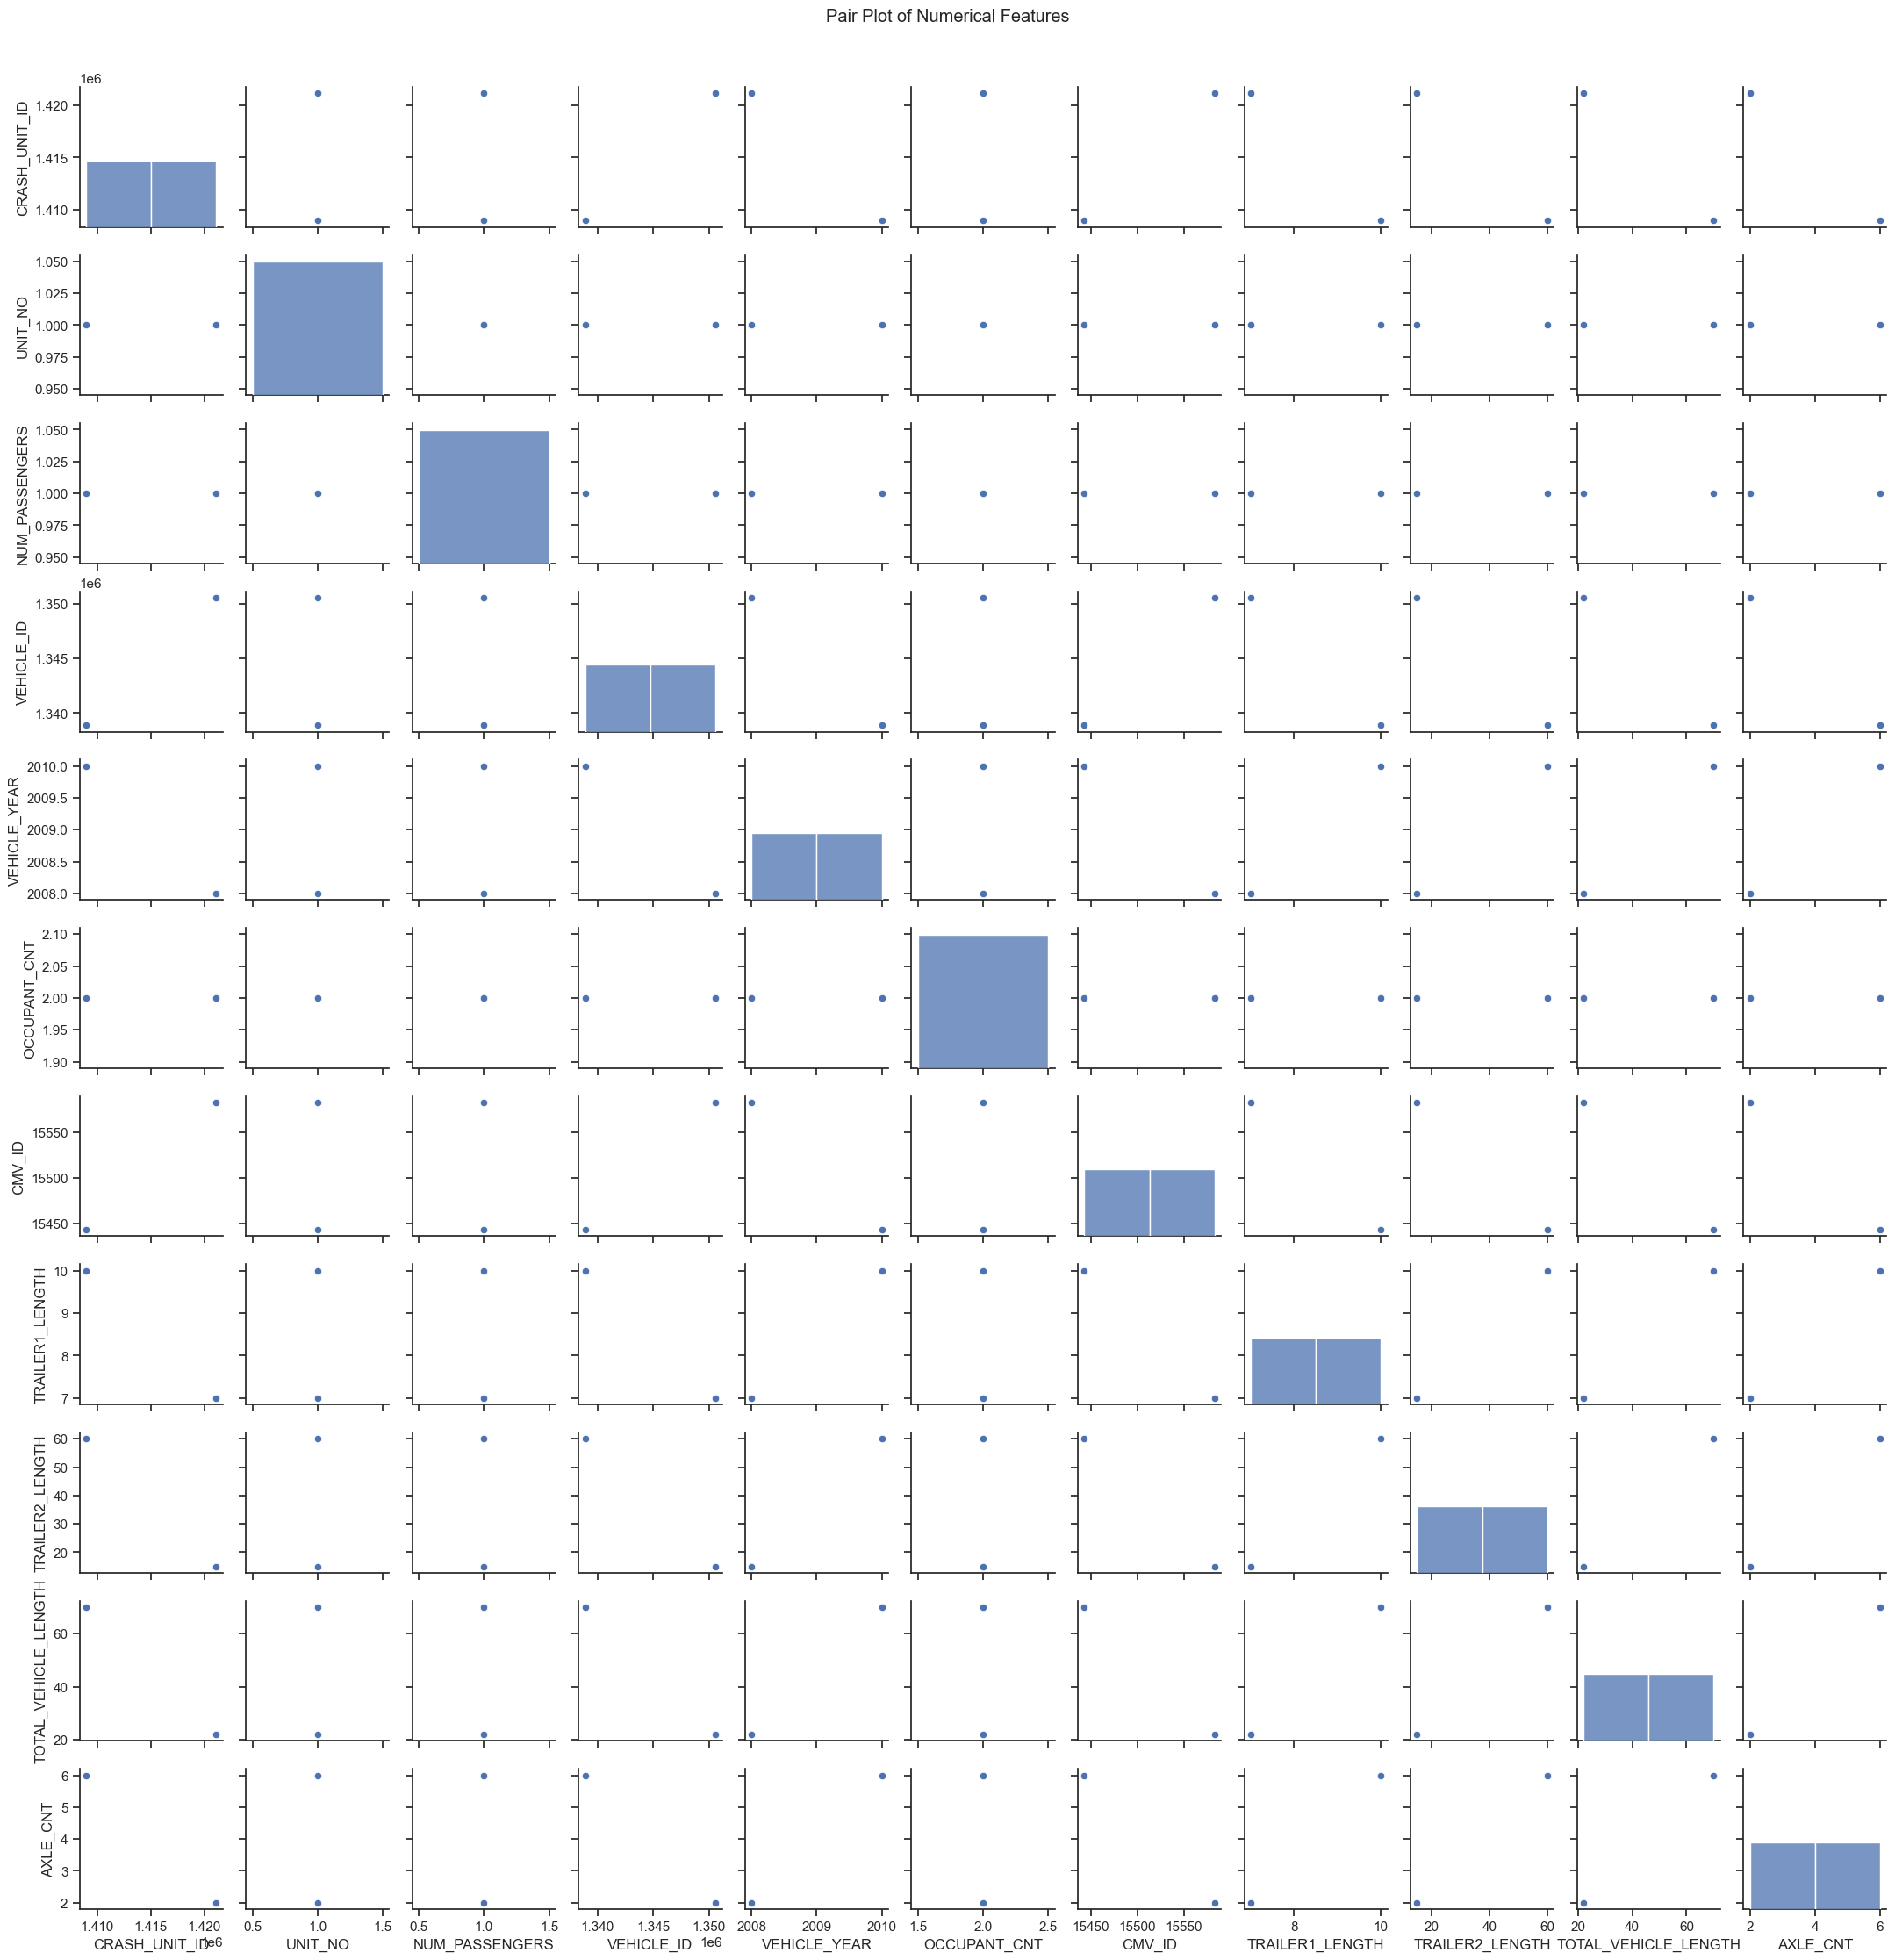

In [48]:
# Selecting only the numerical features for Pair plots
numerical_features = ['CRASH_UNIT_ID', 'UNIT_NO', 'NUM_PASSENGERS', 'VEHICLE_ID', 'VEHICLE_YEAR', 'OCCUPANT_CNT',
                      'CMV_ID', 'TRAILER1_LENGTH', 'TRAILER2_LENGTH', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT']
# Pair Plot
sns.set(style="ticks")
sns.pairplot(df_Vehicles[numerical_features].dropna(), height=2, markers='o')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only the numerical features for B
numerical_features = ['POSTED_SPEED_LIMIT', 'LANE_CNT', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
                      'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
                      'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN',
                      'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE']

# Box Plot
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
sns.boxplot(data=df_Vehicles[numerical_features].dropna(), orient="v", palette="Set2")
plt.title('Box Plot of Numerical Features')
plt.show()


KeyError: "None of [Index(['POSTED_SPEED_LIMIT', 'LANE_CNT', 'STREET_NO', 'BEAT_OF_OCCURRENCE',\n       'NUM_UNITS', 'INJURIES_TOTAL', 'INJURIES_FATAL',\n       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',\n       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',\n       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',\n       'LATITUDE', 'LONGITUDE'],\n      dtype='object')] are in the [columns]"

<Figure size 1500x800 with 0 Axes>

## Data Cleaning & Preprocessing

In [99]:
#Dropping columns with missing data
columns_drop = ['HAZMAT_CLASS','MCS_OUT_OF_SERVICE_I','HAZMAT_OUT_OF_SERVICE_I','LOAD_TYPE','CARGO_BODY_TYPE','VEHICLE_CONFIG','AXLE_CNT','TOTAL_VEHICLE_LENGTH','TRAILER2_LENGTH','TRAILER1_LENGTH','TRAILER2_WIDTH','TRAILER1_WIDTH','WIDE_LOAD_I','IDOT_PERMIT_NO','MCS_VIO_CAUSE_CRASH_I','HAZMAT_VIO_CAUSE_CRASH_I','MCS_REPORT_NO','MCS_REPORT_I','HAZMAT_REPORT_NO','HAZMAT_REPORT_I','HAZMAT_PRESENT_I','UN_NO','HAZMAT_NAME','HAZMAT_PLACARDS_I','CARRIER_CITY','CARRIER_STATE','CARRIER_NAME','GVWR','COMMERCIAL_SRC','ILCC_NO','CCMC_NO','USDOT_NO','CMV_ID','EXCEED_SPEED_LIMIT_I','TOWED_BY','TOWED_TO', 'AREA_00_I','AREA_01_I','AREA_02_I','AREA_03_I','AREA_04_I','AREA_05_I','AREA_06_I','AREA_07_I','AREA_08_I','AREA_09_I','AREA_10_I','AREA_11_I','AREA_12_I','AREA_99_I','FIRE_I','TRAVEL_DIRECTION','LIC_PLATE_STATE','CMRC_VEH_I','NUM_PASSENGERS','CRASH_UNIT_ID','TOWED_I','CRASH_DATE','FIRST_CONTACT_POINT', 'WIDE_LOAD_I', 'CCMC_NO', 'MCS_REPORT_NO']
df_droppedVehicles = df_Vehicles.drop(columns=columns_drop)
df_droppedVehicles.head(5)

,CRASH_RECORD_ID,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,OCCUPANT_CNT,CRASH_YEAR
0,f5943b05f46b8d4148a63b7506a59113eae0cf1075aabc...,2,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
1,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,1,DRIVER,1634931.0,NISSAN,SENTRA,2009.0,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,SLOW/STOP IN TRAFFIC,1.0,2023
2,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,2,DRIVER,1634978.0,CHRYSLER,SEBRING,2010.0,NONE,PASSENGER,PERSONAL,PASSING/OVERTAKING,1.0,2023
3,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,1,DRIVER,1634948.0,SUBARU,OUTBACK,2015.0,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,1.0,2023
4,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,1,DRIVER,1637401.0,TOYOTA,RAV4,2018.0,UNKNOWN,PASSENGER,PERSONAL,STRAIGHT AHEAD,1.0,2023


In [100]:
# Reviewing the columns (in percentage of missing values)
new_missing_vehicles = (df_droppedVehicles.isnull().sum() / len(df_droppedVehicles)) * 100
new_missing_vehicles

CRASH_RECORD_ID     0.000000
UNIT_NO             0.000000
UNIT_TYPE           0.100691
VEHICLE_ID          2.234749
MAKE                2.234749
MODEL               2.234749
VEHICLE_YEAR       17.963769
VEHICLE_DEFECT      2.234749
VEHICLE_TYPE        2.234749
VEHICLE_USE         2.234749
MANEUVER            2.234749
OCCUPANT_CNT        2.234749
CRASH_YEAR          0.000000
dtype: float64

In [101]:
# Create a DataFrame to display missing value statistics
missing_vehicles = pd.DataFrame({'Column': df_droppedVehicles.columns, 'Missing Percentage': new_missing_vehicles})
missing_vehicles = missing_vehicles.sort_values(by='Missing Percentage', ascending=False)
print(missing_vehicles)

                          Column  Missing Percentage
VEHICLE_YEAR        VEHICLE_YEAR           17.963769
VEHICLE_ID            VEHICLE_ID            2.234749
MAKE                        MAKE            2.234749
MODEL                      MODEL            2.234749
VEHICLE_DEFECT    VEHICLE_DEFECT            2.234749
VEHICLE_TYPE        VEHICLE_TYPE            2.234749
VEHICLE_USE          VEHICLE_USE            2.234749
MANEUVER                MANEUVER            2.234749
OCCUPANT_CNT        OCCUPANT_CNT            2.234749
UNIT_TYPE              UNIT_TYPE            0.100691
CRASH_RECORD_ID  CRASH_RECORD_ID            0.000000
UNIT_NO                  UNIT_NO            0.000000
CRASH_YEAR            CRASH_YEAR            0.000000


In [102]:
# Calculate the threshold for 90% missing values - in case we missed a row
threshold = 0.9 * len(df_Vehicles)

# Drop columns with more than 90% missing values
Vehicles_cleaned = df_droppedVehicles.dropna(thresh=threshold, axis=1)

# Display the remaining columns
print("Remaining columns:")
print(Vehicles_cleaned.columns)

Remaining columns:
Index(['CRASH_RECORD_ID', 'UNIT_NO', 'UNIT_TYPE', 'VEHICLE_ID', 'MAKE',
       'MODEL', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER',
       'OCCUPANT_CNT', 'CRASH_YEAR'],
      dtype='object')


In [103]:
Vehicles_cleaned.shape

(670366, 12)

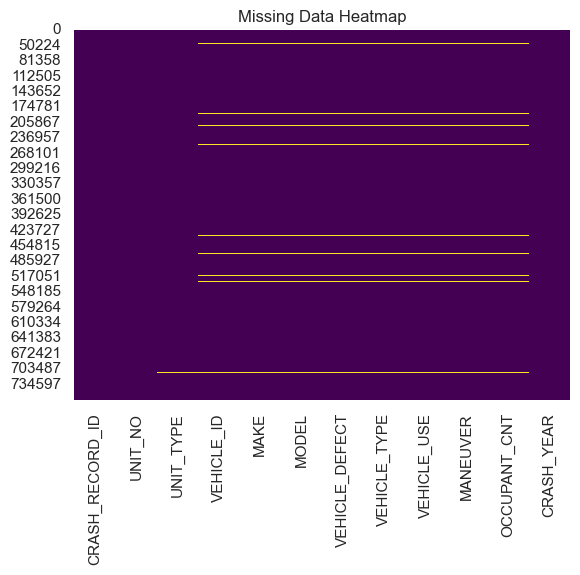

In [104]:
# Create a heatmap to check for missing values against the cleaned dataframe
sns.heatmap(Vehicles_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

## People Dataset - Exploration & Understanding

### Structure of Crashes Dataset

In [105]:
#Checking the column names, data types, and basic structure
df_People.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [106]:
#Checking for any potential inconsistencies or errors at the end of the data
df_People.tail()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
1765143,P382511,PASSENGER,9d3f0c15dd51b93fffae416782b4e9897c3227a9478848...,1646504.0,12/23/2023 08:25:00 PM,4.0,NaN,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1765144,P382512,PASSENGER,9d3f0c15dd51b93fffae416782b4e9897c3227a9478848...,1646507.0,12/23/2023 08:25:00 PM,3.0,CHICAGO,IL,60644,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1765145,P382517,PASSENGER,ec0e505e7c3b010648e71656c1c936ccfddeaef8fc176c...,1646540.0,12/23/2023 04:55:00 PM,3.0,NaN,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1765146,P382518,PASSENGER,ec0e505e7c3b010648e71656c1c936ccfddeaef8fc176c...,1646540.0,12/23/2023 04:55:00 PM,4.0,NaN,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1765147,P382519,PASSENGER,ec0e505e7c3b010648e71656c1c936ccfddeaef8fc176c...,1646540.0,12/23/2023 04:55:00 PM,6.0,NaN,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Apart from missing most of data,  the tail() seems to be consistent with the head()

In [107]:
#Summary of the DataFrame:column names, data types,data shape, non-null counts, memory usage, and other characteristics.
df_People.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765148 entries, 0 to 1765147
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   ZIPCODE                object 
 9   SEX                    object 
 10  AGE                    float64
 11  DRIVERS_LICENSE_STATE  object 
 12  DRIVERS_LICENSE_CLASS  object 
 13  SAFETY_EQUIPMENT       object 
 14  AIRBAG_DEPLOYED        object 
 15  EJECTION               object 
 16  INJURY_CLASSIFICATION  object 
 17  HOSPITAL               object 
 18  EMS_AGENCY             object 
 19  EMS_RUN_NO             object 
 20  DRIVER_ACTION          object 
 21  DRIVER_VISION          object 
 22  PHYSICAL_CONDITION

In [108]:
# Checking for central tendency, spread, and potential outliers in numerical data
df_People.describe()

,VEHICLE_ID,SEAT_NO,AGE,BAC_RESULT VALUE
count,1.729854e+06,356839.000000,1.249963e+06,1988.000000
mean,8.298957e+05,4.162140,3.788849e+01,0.169975
std,4.823080e+05,2.209454,1.709080e+01,0.101331
min,2.000000e+00,1.000000,-1.770000e+02,0.000000
25%,4.125610e+05,3.000000,2.500000e+01,0.120000
50%,8.199105e+05,3.000000,3.500000e+01,0.170000
75%,1.248712e+06,5.000000,5.000000e+01,0.220000
max,1.670962e+06,12.000000,1.100000e+02,1.000000


### Indicate Observation

In [109]:
# Checking the value count of the data types
print("Data types: ","\n", df_People.dtypes.value_counts())

Data types:  
 object     25
float64     4
Name: count, dtype: int64


In [110]:
df_People.value_counts()

Series([], Name: count, dtype: int64)

### Checking for Duplicates

In [111]:
# Checking for duplicates 
duplicates = df_People.duplicated()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

# Display the duplicate rows
duplicate_rows = df_People[duplicates]
print("Duplicate Rows:")
print(duplicate_rows)

Number of duplicate rows: 0
Duplicate Rows:
Empty DataFrame
Columns: [PERSON_ID, PERSON_TYPE, CRASH_RECORD_ID, VEHICLE_ID, CRASH_DATE, SEAT_NO, CITY, STATE, ZIPCODE, SEX, AGE, DRIVERS_LICENSE_STATE, DRIVERS_LICENSE_CLASS, SAFETY_EQUIPMENT, AIRBAG_DEPLOYED, EJECTION, INJURY_CLASSIFICATION, HOSPITAL, EMS_AGENCY, EMS_RUN_NO, DRIVER_ACTION, DRIVER_VISION, PHYSICAL_CONDITION, PEDPEDAL_ACTION, PEDPEDAL_VISIBILITY, PEDPEDAL_LOCATION, BAC_RESULT, BAC_RESULT VALUE, CELL_PHONE_USE]
Index: []

[0 rows x 29 columns]


##### The People dataset does not contain any identical rows, and each row is unique based on the columns you've considered. This is a good sign, as it suggests that there are no exact duplicates in your data.

### Checking for Missing Data

In [112]:
#get the count of null values in each column:
null_summary = df_People.isnull().sum()
data_types = df_People.dtypes
# Combine null values and data types into a summary DataFrame
summary_People = pd.DataFrame({'Null Values': null_summary, 'Data Types': data_types})
print(summary_People)

                       Null Values Data Types
PERSON_ID                        0     object
PERSON_TYPE                      0     object
CRASH_RECORD_ID                  0     object
VEHICLE_ID                   35294    float64
CRASH_DATE                       0     object
SEAT_NO                    1408309    float64
CITY                        479735     object
STATE                       461035     object
ZIPCODE                     586327     object
SEX                          29048     object
AGE                         515185    float64
DRIVERS_LICENSE_STATE       730369     object
DRIVERS_LICENSE_CLASS       898888     object
SAFETY_EQUIPMENT              4924     object
AIRBAG_DEPLOYED              33947     object
EJECTION                     21835     object
INJURY_CLASSIFICATION          718     object
HOSPITAL                   1471525     object
EMS_AGENCY                 1583351     object
EMS_RUN_NO                 1735026     object
DRIVER_ACTION               360007

In [113]:
# Calculate percentage of missing values
missingpeople_percentage = (df_People.isnull().sum() / len(df_People)) * 100
missingpeople_percentage

PERSON_ID                 0.000000
PERSON_TYPE               0.000000
CRASH_RECORD_ID           0.000000
VEHICLE_ID                1.999492
CRASH_DATE                0.000000
SEAT_NO                  79.784188
CITY                     27.178174
STATE                    26.118773
ZIPCODE                  33.216875
SEX                       1.645641
AGE                      29.186504
DRIVERS_LICENSE_STATE    41.377210
DRIVERS_LICENSE_CLASS    50.924228
SAFETY_EQUIPMENT          0.278957
AIRBAG_DEPLOYED           1.923182
EJECTION                  1.237007
INJURY_CLASSIFICATION     0.040676
HOSPITAL                 83.365531
EMS_AGENCY               89.700750
EMS_RUN_NO               98.293514
DRIVER_ACTION            20.395287
DRIVER_VISION            20.424860
PHYSICAL_CONDITION       20.340901
PEDPEDAL_ACTION          98.097893
PEDPEDAL_VISIBILITY      98.101462
PEDPEDAL_LOCATION        98.098063
BAC_RESULT               20.339711
BAC_RESULT VALUE         99.887375
CELL_PHONE_USE      

In [114]:
# Create a DataFrame to display missing value statistics
missingpeople_stats = pd.DataFrame({'Column': df_People.columns, 'Missing Percentage': missingpeople_percentage})
missingpeople_stats = missingpeople_stats.sort_values(by='Missing Percentage', ascending=False)
print(missingpeople_stats)

                                      Column  Missing Percentage
CELL_PHONE_USE                CELL_PHONE_USE           99.934340
BAC_RESULT VALUE            BAC_RESULT VALUE           99.887375
EMS_RUN_NO                        EMS_RUN_NO           98.293514
PEDPEDAL_VISIBILITY      PEDPEDAL_VISIBILITY           98.101462
PEDPEDAL_LOCATION          PEDPEDAL_LOCATION           98.098063
PEDPEDAL_ACTION              PEDPEDAL_ACTION           98.097893
EMS_AGENCY                        EMS_AGENCY           89.700750
HOSPITAL                            HOSPITAL           83.365531
SEAT_NO                              SEAT_NO           79.784188
DRIVERS_LICENSE_CLASS  DRIVERS_LICENSE_CLASS           50.924228
DRIVERS_LICENSE_STATE  DRIVERS_LICENSE_STATE           41.377210
ZIPCODE                              ZIPCODE           33.216875
AGE                                      AGE           29.186504
CITY                                    CITY           27.178174
STATE                    

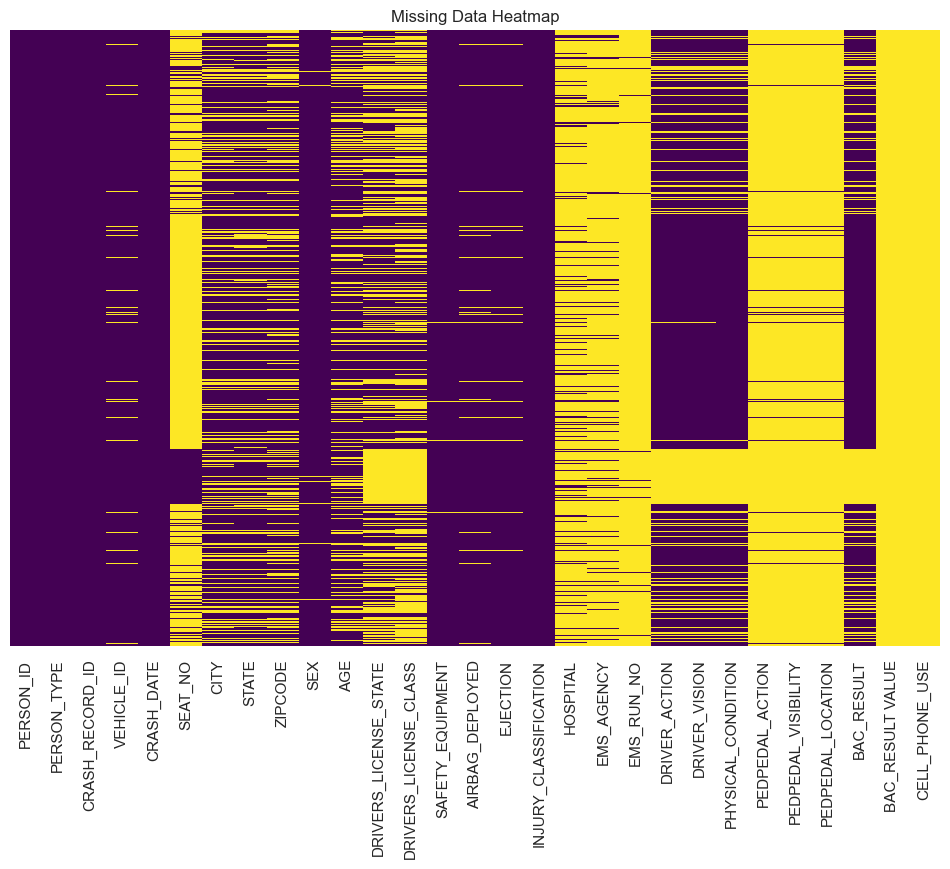

In [133]:
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(df_People.isnull(), cbar=False, cmap='viridis', yticklabels=False)  # Adjust yticklabels to False
plt.title('Missing Data Heatmap')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)  # Add grid lines
plt.show()

#### Observations

### Visualizing the counts of different categories

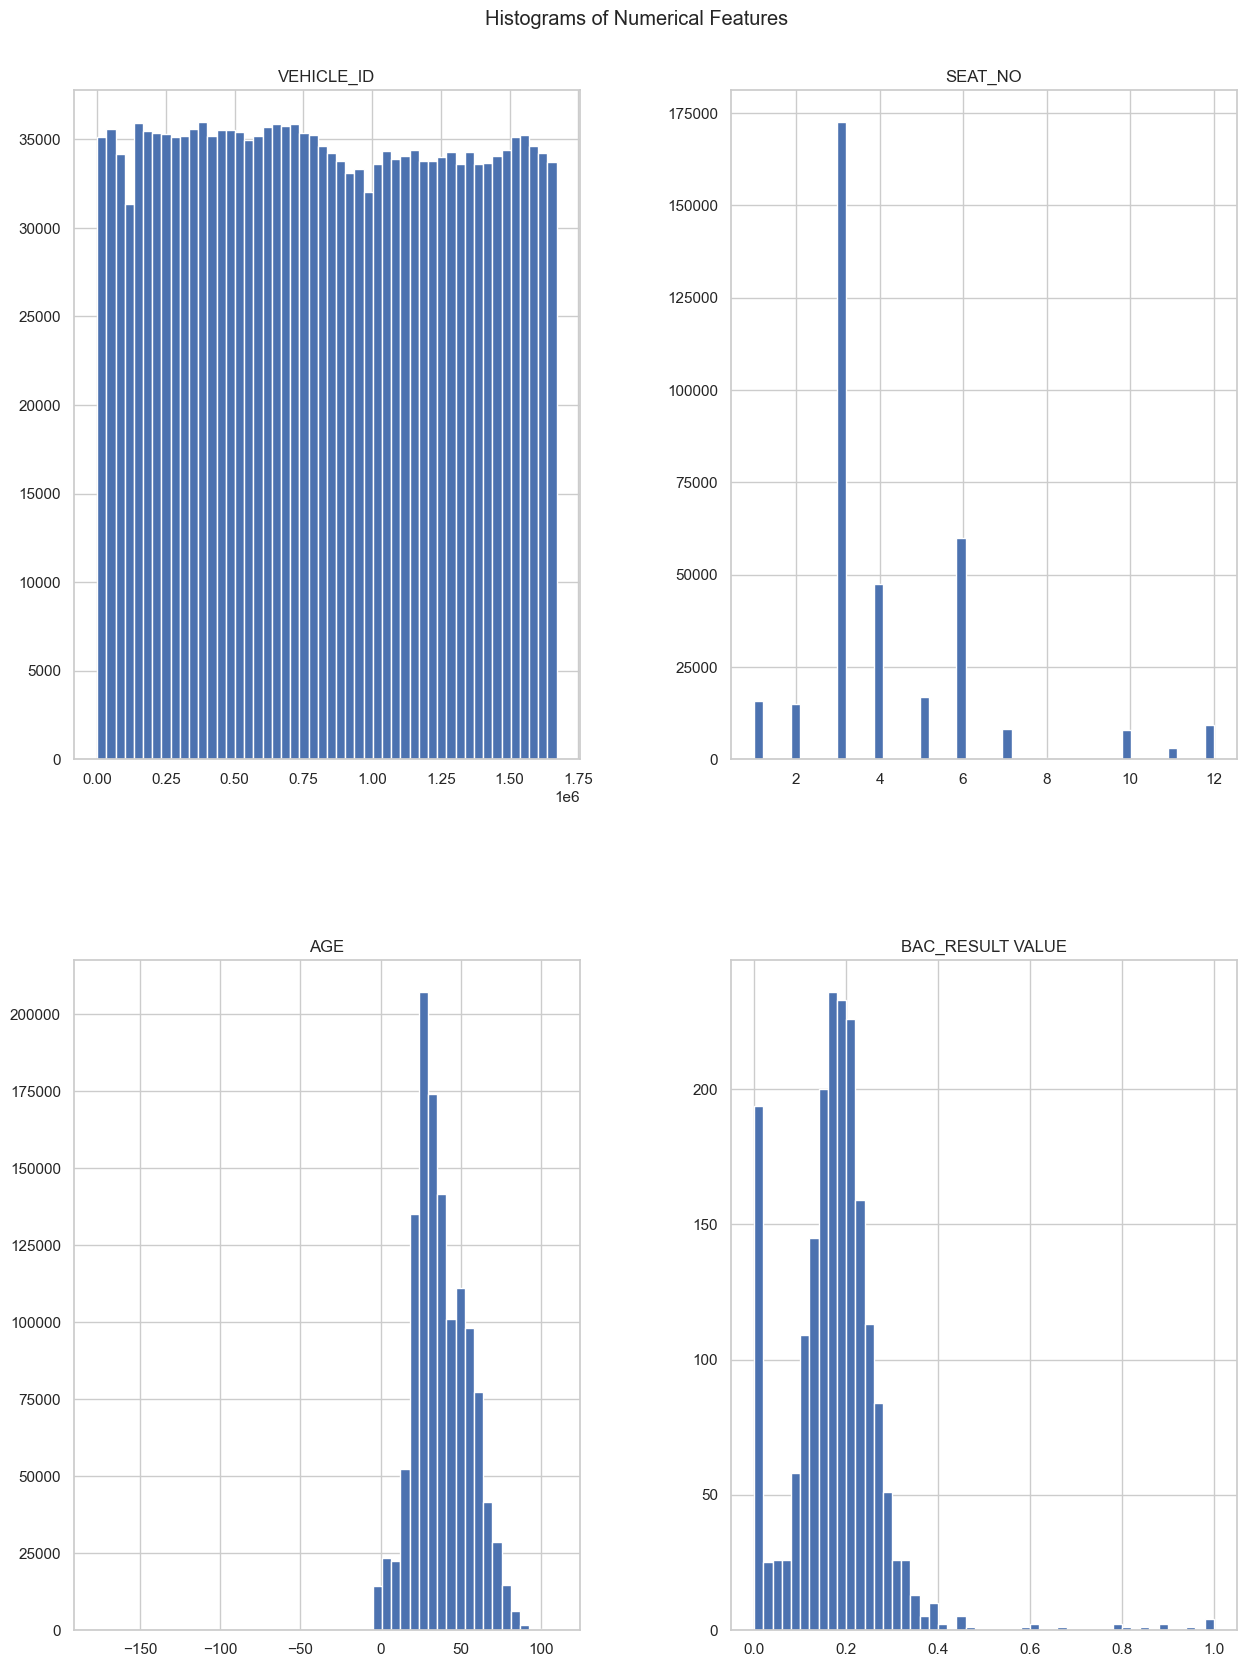

In [134]:
# Using Histograms to check the distribution of the numerical features
df_People.hist(figsize=(15, 20), bins=50)
plt.suptitle('Histograms of Numerical Features', y=0.92)
plt.show()

## Data Cleaning & Preprocessing

In [135]:
columns_drop = ['CELL_PHONE_USE','BAC_RESULT VALUE','PEDPEDAL_LOCATION','PEDPEDAL_VISIBILITY','PEDPEDAL_ACTION','EMS_RUN_NO', 'EMS_AGENCY','HOSPITAL', 'SEAT_NO']
df_droppedPeople = df_People.drop(columns=columns_drop)
df_droppedPeople.head(5)

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,CHICAGO,IL,60620,M,37.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,IMPROPER BACKING,UNKNOWN,UNKNOWN,TEST NOT OFFERED
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED


In [136]:
# Reviewing the columns (in percentage of missing values)
new_missing_percentage = (df_droppedPeople.isnull().sum() / len(df_droppedPeople)) * 100
new_missing_percentage

PERSON_ID                 0.000000
PERSON_TYPE               0.000000
CRASH_RECORD_ID           0.000000
VEHICLE_ID                1.999492
CRASH_DATE                0.000000
CITY                     27.178174
STATE                    26.118773
ZIPCODE                  33.216875
SEX                       1.645641
AGE                      29.186504
DRIVERS_LICENSE_STATE    41.377210
DRIVERS_LICENSE_CLASS    50.924228
SAFETY_EQUIPMENT          0.278957
AIRBAG_DEPLOYED           1.923182
EJECTION                  1.237007
INJURY_CLASSIFICATION     0.040676
DRIVER_ACTION            20.395287
DRIVER_VISION            20.424860
PHYSICAL_CONDITION       20.340901
BAC_RESULT               20.339711
dtype: float64

In [137]:
# Create a DataFrame to display missing value statistics
new_missing_people = pd.DataFrame({'Column': df_droppedPeople.columns, 'Missing Percentage': new_missing_percentage})
new_missing_people = new_missing_people.sort_values(by='Missing Percentage', ascending=False)
print(new_missing_people)

                                      Column  Missing Percentage
DRIVERS_LICENSE_CLASS  DRIVERS_LICENSE_CLASS           50.924228
DRIVERS_LICENSE_STATE  DRIVERS_LICENSE_STATE           41.377210
ZIPCODE                              ZIPCODE           33.216875
AGE                                      AGE           29.186504
CITY                                    CITY           27.178174
STATE                                  STATE           26.118773
DRIVER_VISION                  DRIVER_VISION           20.424860
DRIVER_ACTION                  DRIVER_ACTION           20.395287
PHYSICAL_CONDITION        PHYSICAL_CONDITION           20.340901
BAC_RESULT                        BAC_RESULT           20.339711
VEHICLE_ID                        VEHICLE_ID            1.999492
AIRBAG_DEPLOYED              AIRBAG_DEPLOYED            1.923182
SEX                                      SEX            1.645641
EJECTION                            EJECTION            1.237007
SAFETY_EQUIPMENT         

In [138]:
# Calculate the threshold for 90% missing values - in case we missed a row
threshold = 0.9 * len(df_People)

# Drop columns with more than 90% missing values
People_cleaned = df_droppedPeople.dropna(thresh=threshold, axis=1)

# Display the remaining columns
print("Remaining columns:")
print(People_cleaned.columns)

Remaining columns:
Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEX', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION',
       'INJURY_CLASSIFICATION'],
      dtype='object')


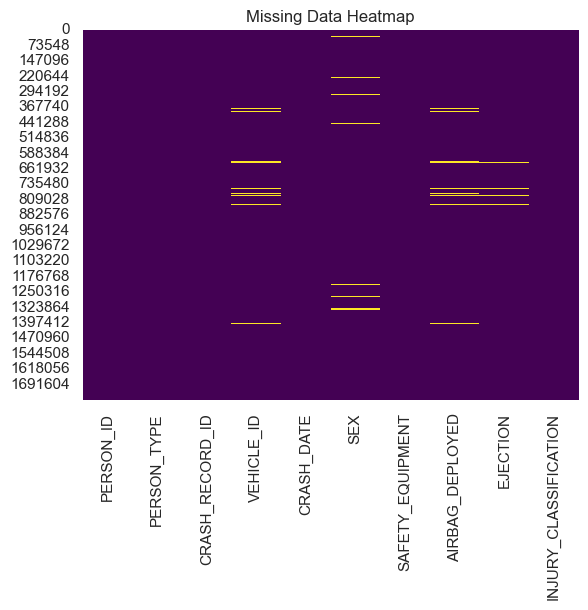

In [139]:
# Create a heatmap of missing values
sns.heatmap(People_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [140]:
People_cleaned.shape

(1765148, 10)

 ## Merging the Data sets (Crashes, Vehicles & People)

In [ ]:
# Rechecking common columns using the intersection of columns
cleaned_common_columns = set(Crashes_cleaned.columns) & set(People_cleaned.columns) & set(Vehicles_cleaned.columns)
print("Common Columns:", common_columns)

In [ ]:
Crashes_cleaned.shape

In [ ]:
Crashes_cleaned.info()

In [ ]:
Vehicles_cleaned.shape

In [ ]:
Vehicles_cleaned.info()

In [ ]:
People_cleaned.shape

In [ ]:
People_cleaned.info()

In [ ]:
#Merging datasets
# Using 'Crashes' as the main dataset
merged_crashes = Crashes_cleaned.merge(Vehicles_cleaned, on='CRASH_RECORD_ID', how='inner')
merged_crashes = merged_crashes.merge(People_cleaned, on='CRASH_RECORD_ID', how='inner')

#### Merging Datasets

#### Methodology: Inner Join on 'CRASH_YEAR' and 'CRASH_RECORD_ID':

This method only keeps records where all three datasets have matching entries based on both "CRASH_YEAR" and "CRASH_RECORD_ID". This not only ensures consistency and relevance of merged data, but it also reduces missing values and potential noise.

We'd rather run the risk of excluding crash records without matching entries in other datasets. Potentially losing valuable information seems like a better option compared to taking the risk of introducing many missing values if entries in "Vehicles_cleaned" and "People-cleaned" are sparse and risk of diluting the analysis with irrelevant information from non-matching entries..

In [ ]:
# Merging Crashes and Vehicle datasets on 'CRASH_YEAR' and 'CRASH_RECORD_ID' first
merged_crashes = Crashes_cleaned.merge(Vehicles_cleaned, how='inner', on=['CRASH_YEAR', 'CRASH_RECORD_ID'])

# Merging the result above with People on 'CRASH_RECORD_ID' only
df_merged_crashes = pd.merge(merged_crashes, People_cleaned, on='CRASH_RECORD_ID', how='inner')

## Merged Dataset - Exploration & Understanding

### Structure of Crashes Dataset

In [ ]:
#Checking the column names, data types, and basic structure
df_merged_crashes.head(15)

In [ ]:
#Checking for any potential inconsistencies or errors at the end of the data
df_merged_crashes.tail()

#### The info on the head() seems to be cosistent with what's at the tail()

In [ ]:
#Summary of the DataFrame:column names, data types,data shape, non-null counts, memory usage, and other characteristics.
df_merged_crashes.info()

In [ ]:
# Checking for central tendency, spread, and potential outliers in numerical data
df_merged_crashes.describe()

### Indicate Observation

In [ ]:
# Unique numeric features
num_columns = df_merged_crashes._get_numeric_data().columns
num_columns

In [ ]:
#Unique non-numerical features_Categorical
non_numeric_columns = df_merged_crashes.select_dtypes(exclude='number').columns
print(non_numeric_columns)

In [ ]:
# Checking the value count of the data types
print("Data types: ","\n", df_merged_crashes.dtypes.value_counts())

### Checking for Duplicates

In [ ]:
# Checking for duplicate rows
duplicates = df_merged_crashes.duplicated()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

# Display the duplicate rows
duplicate_rows = df_merged_crashes.loc[duplicates]
print("Duplicate Rows:")
print(duplicate_rows)


In [ ]:
# Check for duplicate rows based on all columns
duplicates_all = df_merged_crashes.duplicated()

# Check for duplicate rows based on specific columns
# Checking duplicates based on 'PERSON_ID' 'CRASH_DATE'
duplicates_subset = df_merged_crashes.duplicated(subset=['CRASH_RECORD_ID'])

# Print out the duplicate rows
print("All duplicates:")
print(df_merged_crashes[duplicates_all])

print("\nSubset duplicates:")
print(df_merged_crashes[duplicates_subset])

### Checking for Missing Data

In [ ]:
# Checking for missing values
df_merged_crashes.isnull().sum()

In [ ]:
# Calculate percentage of missing value
missing_percentagemerged = (df_merged_crashes.isnull().sum() / len(df_merged_crashes)) * 100
missing_percentagemerged

In [ ]:
# Df for checking missing value statistics on the merged dataset
missingstats_mergedcrashes = pd.DataFrame({'Column': df_merged_crashes.columns, 'Missing Percentage': missing_percentagemerged})
missingstats_mergedcrashes = missingstats_mergedcrashes.sort_values(by='Missing Percentage', ascending=False)
print(missingstats_mergedcrashes)

In [ ]:
# Creating a heatmap of the missing values above
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(df_merged_crashes.isnull(), cbar=False, cmap='viridis', yticklabels=False)  # Adjusting yticklabels to False
plt.title('Missing Data Heatmap')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)  # Adding grid lines
plt.show()

### Visualizing the counts of different categories

In [ ]:
# Create subplots dynamically based on the number of features
num_features = len(numerical_features)
num_rows = int(np.ceil(num_features / 3))
num_cols = min(num_features, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Define a list of colors
colors = ['skyblue', 'salmon', 'green', 'orange', 'purple', 'pink', 'brown', 'gray', 'cyan', 'yellow', 'red', 'blue', 'black']

# Plot histograms for each numerical feature with different colors
for i, feature in enumerate(numerical_features):
    color = colors[i % len(colors)]  # Use modulo to cycle through colors if there are more features than colors
    axes[i].hist(df_merged_crashes[feature].dropna(), bins=20, color=color, edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Selecting only the numerical features for scatter plots
numerical_features = ['POSTED_SPEED_LIMIT', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'INJURIES_TOTAL', 'INJURIES_FATAL',
                       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 
                       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE','CRASH_YEAR', 
                       'UNIT_NO', 'VEHICLE_ID_x', 'OCCUPANT_CNT','VEHICLE_ID_y']

# Create scatter plots
plt.figure(figsize=(15, 15))
sns.set(style="ticks")

# Pair plots for numerical features
sns.pairplot(df_merged_crashes[numerical_features].dropna(), height=2, markers='o')

# Adjust layout to avoid warning
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Selecting only the numerical features for Pair plots
numerical_features = ['POSTED_SPEED_LIMIT', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'INJURIES_TOTAL', 'INJURIES_FATAL',
                       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 
                       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE','CRASH_YEAR', 
                       'UNIT_NO', 'VEHICLE_ID_x', 'OCCUPANT_CNT','VEHICLE_ID_y']
# Pair Plot
sns.set(style="ticks")
sns.pairplot(df_merged_crashes[numerical_features].dropna(), height=2, markers='o')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

In [ ]:
# Selecting only the numerical features for Box plot
numerical_features = ['POSTED_SPEED_LIMIT', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'INJURIES_TOTAL', 'INJURIES_FATAL',
                       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 
                       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE','CRASH_YEAR', 
                       'UNIT_NO', 'VEHICLE_ID_x', 'OCCUPANT_CNT','VEHICLE_ID_y']]

# Box Plot
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
sns.boxplot(data=df[numerical_features].dropna(), orient="v", palette="Set2")
plt.title('Box Plot of Numerical Features')
plt.show()

#### Checking Number of Crashes/ Hour

In [ ]:
sns.set_theme(style='darkgrid')

# Convert 'CRASH_DATE_x' to datetime format with specified format
df_merged_crashes['CRASH_DATE_x'] = pd.to_datetime(df_merged_crashes['CRASH_DATE_x'], format='%Y-%m-%d %H:%M:%S')

# Setting 'CRASH_DATE' as the column you want to use
df_merged_crashes.loc[:, 'Hour'] = df_merged_crashes['CRASH_DATE_x'].dt.hour

# Plot number of crashes by hour of day
plt.figure(figsize=(15, 8))
s = sns.barplot(
    data=df_merged_crashes.groupby('Hour')['CRASH_RECORD_ID'].nunique().reset_index(),
    x='Hour',
    y='CRASH_RECORD_ID',
    palette='GnBu_r',
    linewidth=0
)

s.set_title('Hourly Number of Reported Crashes in Chicago', y=1.02, fontsize=14)
s.set_xlabel('Hour of Day', fontsize=13, labelpad=15)
s.set_ylabel('Number of Crashes', fontsize=13, labelpad=15)

plt.show()


### Checking Weather conditions against type of crash

In [ ]:
#  which weather condition has the most crashes for each of the crash types.
df_merged_crashes.groupby('FIRST_CRASH_TYPE')['WEATHER_CONDITION'].apply(lambda x: x.value_counts().head(1)).reset_index(name='COUNT').rename(columns={'level_1': 'WEATHER'})


### Checking for main causes of accidents

In [ ]:
value_counts = df_merged_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()
print(value_counts)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the figure size
plt.figure(figsize=(15, 15))

# Plot the countplot
sns.countplot(data=df_merged_crashes, y='PRIM_CONTRIBUTORY_CAUSE', order=df_merged_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index)

# Add title and adjust font size
plt.title('Primary Contributing Cause of Reported Crashes in Chicago', y=1.02, fontsize=16)

# Increase font size for axis labels
plt.xlabel('Number of Crashes', fontsize=14, labelpad=15)
plt.ylabel('Primary Contributing Cause', fontsize=14, labelpad=15)

# Rotate y-axis labels for better visibility
plt.yticks(rotation=45, ha='right', fontsize=12)

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2 - 0.2),
                       ha='left', va='center', fontsize=10, color='black')

# Show the plot
plt.show()

### Checking correlation for the data

## Data Cleaning & Preprocessing

### Checking for duplicates

In [ ]:
# Checking for duplicates- To delete


In [ ]:
# Dropping duplicated values
merged_crashes = merged_crashes.drop_duplicates()

In [ ]:
# Confirming that there are no duplicates
duplicates = merged_crashes.duplicated()

In [ ]:
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(merged_crashes.isnull(), cbar=False, cmap='viridis', yticklabels=False)  # Adjust yticklabels to False
plt.title('Missing Data Heatmap')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)  # Add grid lines
plt.show()

In [ ]:
# Create a DataFrame to display missing value statistics
missing_stats = pd.DataFrame({'Column': merged_crashes.columns, 'Missing Percentage': missing_percentage})
missing_stats = missing_stats.sort_values(by='Missing Percentage', ascending=False)
print(missing_stats)

In [ ]:
#Checking all the rows
# Set the maximum number of rows to display to the length of the DataFrame
pd.set_option('display.max_rows', len(missing_stats))

# Print the DataFrame
print(missing_stats)

# Reset the display option to the default value if needed
pd.reset_option('display.max_rows')

In [ ]:
# Display a concisely if the dataset is clear of null values
missing_values_summary = merged_crashes.isna().sum()
print(missing_values_summary[missing_values_summary > 0])

#### Given the data set above, we're not dropping any more columns

##### Suggestion to drop more data sets: Rhoda.

In [ ]:
# preview the dataset columns
merged_crashes.columns

In [ ]:
merged_crashes.info()

In [ ]:
# Checking the value count of the data types
print("Data types: ","\n", merged_crashes.dtypes.value_counts())

In [ ]:
# Confirming the values under the target feature
value_counts = merged_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()
print(value_counts)

#### One-hot encoding

In [ ]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [ ]:
{column:len(merged_crashes[column].unique()) for column in merged_crashes.columns if merged_crashes.dtypes[column] == 'object'}

In [ ]:
#Dropping columns with very high values
#Reducing cardinality
dropped_columns = ['CRASH_RECORD_ID', 'CITY', 'ZIPCODE', 'CRASH_DATE_x', 'DATE_POLICE_NOTIFIED', 'LOCATION','MODEL', 'PERSON_ID', 'CRASH_DATE_y']

In [ ]:
{column:len(merged_crashes[column].unique()) for column in merged_crashes.columns if merged_crashes.dtypes[column] == 'object'}

In [ ]:
# Define columns_to_encode first
columns_to_encode = ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'STREET_NAME', 'MOST_SEVERE_INJURY', 'UNIT_TYPE', 'MAKE', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER', 'PERSON_TYPE', 'STATE', 'SEX', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'BAC_RESULT']

# Creating prefixes using columns_to_encode
prefixes = [column[:2].upper() for column in columns_to_encode]

# Now use columns_to_encode and prefixes in pd.get_dummies
encoded_df = pd.get_dummies(merged_crashes, columns=columns_to_encode, prefix=prefixes)


In [ ]:
encoded_df

In [ ]:
def get_binary_columns(df):
    return df.applymap(lambda x: 1 if x else 0)

In [ ]:
binary_encoded_df = get_binary_columns(encoded_df)

In [ ]:
# Reducing cardinality
# Limiting unique values to top N frequent values
top_n_values = 20
for column in non_numeric_columns:
    top_values = merged_crashes[column].value_counts().nlargest(top_n_values).index
    merged_crashes[column] = merged_crashes[column].where(merged_crashes[column].isin(top_values), 'Other')


In [ ]:
import pandas as pd
# Keeping in mind that 'non_numeric_columns' contains our non-numerical columns
non_numeric_columns = merged_crashes.select_dtypes(exclude='number').columns

# Apply one-hot encoding to non-numerical columns
encoded_merged_crashes = pd.get_dummies(merged_crashes[non_numeric_columns])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Encode categorical variables
label_encoder = LabelEncoder()

chicagocrush1.loc[:,'INJURY_CLASSIFICATION'] = label_encoder.fit_transform(chicagocrush1['INJURY_CLASSIFICATION'])
chicagocrush1.loc[:,'DRIVER_VISION'] = label_encoder.fit_transform(chicagocrush1['DRIVER_VISION'])
chicagocrush1.loc[:,'DRIVER_ACTION'] = label_encoder.fit_transform(chicagocrush1['DRIVER_ACTION'])
chicagocrush1.loc[:,'PHYSICAL_CONDITION'] = label_encoder.fit_transform(chicagocrush1['PHYSICAL_CONDITION'])
chicagocrush1.loc[:,'LIGHTING_CONDITION'] = label_encoder.fit_transform(chicagocrush1['LIGHTING_CONDITION'])
chicagocrush1.loc[:,'WEATHER_CONDITION'] = label_encoder.fit_transform(chicagocrush1['WEATHER_CONDITION'])
chicagocrush1.loc[:,'AIRBAG_DEPLOYED'] = label_encoder.fit_transform(chicagocrush1['AIRBAG_DEPLOYED'])
chicagocrush1.loc[:,'MAKE'] = label_encoder.fit_transform(chicagocrush1['MAKE'])


## Whatever is down here needs to be aliged with what's already uphere!!

In [ ]:
chicagocrush1.columns

In [ ]:
chicagocrush1.sample(5)

In [ ]:
chicagocrush1['INJURIES_TOTAL'].value_counts()

In [ ]:
# columns to use as independent variables (X)
independent_columns = ['DRIVER_ACTION','DRIVER_VISION','PHYSICAL_CONDITION', 'LIGHTING_CONDITION','WEATHER_CONDITION']

# Assigning independent variables (X) 
X = chicagocrush1[independent_columns]

# Assigning the dependent variable (y)
y = chicagocrush1['INJURIES_TOTAL']
X.corr()

In [ ]:
selected_columns =['DRIVER_ACTION','DRIVER_VISION','PHYSICAL_CONDITION', 'LIGHTING_CONDITION','WEATHER_CONDITION','INJURIES_TOTAL']

# Creating a DataFrame with the selected columns
selected_data = chicagocrush1[selected_columns]

# Correlation Matrix Heatmap
correlation_matrix = selected_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# FEATURE ENGINEERING
# Binning age
bins = [0, 25, 50, 100]
labels = ['Young', 'Adult', 'Senior']
chicagocrush1['AGE_GROUP'] = pd.cut(chicagocrush1['AGE'], bins=bins, labels=labels)

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with 'AGE_GROUP' and 'TOTAL_INJURIES' columns

# Group the data by 'AGE_GROUP' and calculate the total injuries for each group
agegroup_total_injuries = chicagocrush1.groupby('AGE_GROUP')['INJURIES_TOTAL'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
agegroup_total_injuries.plot(kind='bar', color='skyblue')
plt.title('Total Injuries by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add gridlines along y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [ ]:
# Time period encoding
chicagocrush1['PERIOD_OF_DAY'] = pd.cut(chicagocrush1['CRASH_HOUR'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
# Group the data by 'PERIOD_OF_DAY' and calculate the total injuries for each group
period_of_day_total_injuries = chicagocrush1.groupby('PERIOD_OF_DAY')['INJURIES_TOTAL'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
period_of_day_total_injuries.plot(kind='bar', color='skyblue')
plt.title('Total Injuries by Period of Day')
plt.xlabel('Period of Day')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add gridlines along y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [ ]:
# Splitting the dataset into train and test sets
X = chicagocrush1.drop(columns=['INJURIES_TOTAL'])  # Features
y = chicagocrush1['INJURIES_TOTAL']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)